# Extrapolate corrections for bands FF version (single spin) (similar part can be found in plotconverge.ipynb)

In [2]:
import numpy as np
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def readch_converge(filename):
    print("only for one (of) spin calculation")
    infil=open(filename,"r").readlines()
    k=[]
    bandsinner=[]
    bandsouter=[]
    banddone=0
    for i in range(len(infil)):
        if "k = " in infil[i]:
            content=infil[i].split()
            k.append([float(aa) for aa in content[3:5]])
            if len(k)>1:
                banddone=1
        elif ("#" not in infil[i]) and (banddone==0):
            content=infil[i].split()
            bandsinner.append(int(content[1]))
            bandsouter.append(int(content[0]))
    nk=len(k)
    bandsinner=np.unique(bandsinner)
    nbinner=len(bandsinner)
    bandsouter=np.unique(bandsouter)
    nb=len(bandsouter)
    print(nk," k points detected")
    print(nb," bands detected")
    print(nbinner," inner bands detected")
    intb=np.zeros((nk,nb,nbinner))
    print("intb: nk*nb*nbinner")
    lk=-1
    readflag=1
    for i in range(len(infil)):
        if ("#" not in infil[i]) and readflag:
            lk+=1
            print(lk)
            for j in range(nb):
                for kl in range(nbinner):
                    content=infil[i+j*(nbinner+2)+kl].split()
                    #print(float(content[2]))
                    intb[lk,j,kl]=float(content[2])
            readflag=0
        elif ("#" in infil[i]) and ("k = " in infil[i]):
            readflag=1
    return intb,np.array(k),np.array(bandsouter),np.array(bandsinner)
#suitable for spin=1,4, should be OK for spin=2 but not tested, proceed with caution.
#return k points,band indexes, spin indexes along with frequency grid and real and imarginary part of sigma, cor,int,res,X
#Ew,sigmar,sigmai are [nk,nspn,nbnd,nfreq] dimensional matrix.
def readspectrum(filename):
    infil=open(filename,"r").readlines()
    nline=len(infil)-2
    count=0
    #fastest index in band, then spin, then k point.
    for i in range(len(infil)):
        if "#" in infil[i]:
            count+=1
        if count==2:
            nfreq=i-2
            break
    print("basic file information of ",filename,":")
    print("  contains ",nfreq," frequency points")
    nblock=int(nline/(nfreq+2))
    nskip=nfreq+2
    print("  contains ",nblock," blocks")
    k=np.zeros((nblock,3))
    spn=np.zeros(nblock)
    bnd=np.zeros(nblock)
    sigmar=np.zeros(nfreq*nblock)
    sigmai=np.zeros(nfreq*nblock)
    Resr=np.zeros(nfreq*nblock)
    Resi=np.zeros(nfreq*nblock)
    Corr=np.zeros(nfreq*nblock)
    Cori=np.zeros(nfreq*nblock)
    Intr=np.zeros(nfreq*nblock)
    Inti=np.zeros(nfreq*nblock)
    Ew=np.zeros(nfreq*nblock)
    l=0
    l1=0
    for i in range(0,nline,nskip):
        content=infil[i+1].split()
        k[l]=np.array([float(aa) for aa in content[0:3]])
        spn[l]=int(content[3])
        bnd[l]=int(content[4])
        l+=1
        for j in range(i+1,i+nfreq+1):
            content=infil[j].split()
            Ew[l1]=float(content[6])
            sigmar[l1]=float(content[7])
            sigmai[l1]=float(content[8])
            Resr[l1]=float(content[9])
            Resi[l1]=float(content[10])
            Corr[l1]=float(content[11])
            Cori[l1]=float(content[12])
            Intr[l1]=float(content[13])
            Inti[l1]=float(content[14])
            l1+=1
    kunique=np.unique(k,axis=0)
    spnunique=np.unique(spn)
    bndunique=np.unique(bnd)
    print("  contains ",len(bndunique)," bands")
    print("  contains ",len(spnunique)," spins")
    print("  contains ",len(kunique)," kpoints")
    nk=len(kunique)
    nbnd=len(bndunique)
    nspn=len(spnunique)
    if len(bndunique)*len(spnunique)*len(kunique)!=nblock:
        print("error: nbnd*nk*nspin != nblocks")
        exit(1)
    print(" extract data successfully, returning data...")
    print("data size:")
    print("k: nk*3")
    print("Ew: nk*nspn*nbnd*nfreq")
    print("sigma,Res,Cor,Int,X: nk*nspn*nbnd*nfreq")
    Ew=Ew.reshape((nk,nspn,nbnd,nfreq))
    sigmar=sigmar.reshape((nk,nspn,nbnd,nfreq))
    sigmai=sigmai.reshape((nk,nspn,nbnd,nfreq))
    Resr=Resr.reshape((nk,nspn,nbnd,nfreq))
    Resi=Resi.reshape((nk,nspn,nbnd,nfreq))
    Corr=Corr.reshape((nk,nspn,nbnd,nfreq))
    Cori=Cori.reshape((nk,nspn,nbnd,nfreq))
    Intr=Intr.reshape((nk,nspn,nbnd,nfreq))
    Inti=Inti.reshape((nk,nspn,nbnd,nfreq))
    Xr=sigmar-Corr
    Xi=sigmai-Cori
    return kunique,spnunique,bndunique,Ew,sigmar,sigmai,Resr,Resi,Corr,Cori,Intr,Inti,Xr,Xi
#currently we need to specify nfreq
def readch_convergeff(filename,nfreq):
    print("only for one (of) spin calculation")
    infil=open(filename,"r").readlines()
    k=[]
    bandsinner=[]
    bandsouter=[]
    banddone=0
    for i in range(len(infil)):
        if "k = " in infil[i]:
            content=infil[i].split()
            k.append([float(aa) for aa in content[3:5]])
            if len(k)>1:
                banddone=1
        elif ("#" not in infil[i]) and (banddone==0):
            content=infil[i].split()
            bandsinner.append(int(content[1]))
            bandsouter.append(int(content[0]))
    nk=len(k)
    bandsinner=np.unique(bandsinner)
    nbinner=len(bandsinner)
    bandsouter=np.unique(bandsouter)
    nb=len(bandsouter)
    print(nk," k points detected.")
    print(nb," bands detected.")
    print(nbinner," inner bands detected.")
    print(nfreq, "frequencies specified from input.")
    intb=np.zeros((nk,nb,nfreq,nbinner))
    print("intb: nk*nb*nfreq*nbinner")
    #delete all commented lines
    i=0
    while i < len(infil):
        if "#" in infil[i]:
            del infil[i]
        else:
            i+=1
    for ik in range(nk):
        for ib in range(nb):
            for iw in range(nfreq):
                for ibn in range(nbinner):
                    content=infil[ik*nb*nfreq*nbinner+ib*(nbinner*nfreq)+iw*(nbinner)+ibn].split()
                    #print(float(content[2]))
                    intb[ik,ib,iw,ibn]=float(content[3])
    return intb,np.array(k),np.array(bandsouter),np.array(bandsinner)
def readeqpdat(filename):
    infil=open(filename,'r').readlines()
    nbnd=int(infil[0].split()[-1])
    print("number of bands in file:",nbnd)
    nk=int(len(infil)/(nbnd+1))
    #number of occupied band
    nf=1
    k=np.zeros((nk,3))
    l=0
    dftet=np.zeros((nk,nbnd))
    gwert=np.zeros((nk,nbnd))
    gweit=np.zeros((nk,nbnd))
    spinlabel=np.ones((nk,nbnd))
    #for metallic system, the band index may be different for different k-points
    blabel=np.zeros((nk,nbnd))
    for i in range(0,len(infil),nbnd+1):
        k[l]=np.array([float(aa) for aa in infil[i].split()[0:3]])
        for j in range(i+1,i+1+nbnd):
            spinlabel[l,j-i-1]=int(infil[j].split()[0])
            blabel[l,j-i-1]=int(infil[j].split()[1])
            dftet[l,j-i-1]=float(infil[j].split()[2])
            gwert[l,j-i-1]=float(infil[j].split()[3])
            if len(infil[j].split())==5:
                gweit[l,j-i-1]=float(infil[j].split()[4])

        l+=1
    print("k is the kpoint list")
    print("all other varialbes have dim: nk*(nb*nspin)")
    return k,blabel,spinlabel,dftet,gwert,gweit
def writeeqpdat(outfilname,k,blabel,spinlabel,dfte,gwer,gwei):
    outfil=open(outfilname,"w")
    nbt=np.shape(blabel)[1]
    ns=np.max(spinlabel)
    for i in range(len(k)):
        outfil.write("{:>13.9f}{:>13.9f}{:>13.9f}{:>8d}\n".format(k[i,0],k[i,1],k[i,2],nbt))
        for j in range(nbt):
            outfil.write("{:>8d}{:>8d}{:>15.9f}{:>15.9f}{:>15.9f}\n".format(int(spinlabel[i,j]),int(blabel[i,j]),dfte[i,j],gwer[i,j],gwei[i,j]))
    outfil.close()

## get intcorrection[ncutoff,nk,nfreq,0,nb] where 0 is for spin index

In [4]:
#extrapolated correction for bands FF version
from scipy.optimize import curve_fit
debug=False
#fitting function
##################################
def obj(x,a,b):
    return a/np.sqrt(x)+b
##################################
suffixes=[30]
#suffixes=[5,10,20,30,35,40,45]
nk=40
nbinner=6000
nb=2
nspin=1
nfreq=21
#the extra 1 is the spin dim
intcorrection=np.zeros((nk,nfreq,1,nb))
intb,k,bandsouter,bandsinner=readch_convergeff("converged/ch_converge.dat",nfreq)
#start from 3000 bands, fit obj function
for ik in range(len(k)):
    for ib in range(len(bandsouter)):
        for iw in range(nfreq):
            par,popc=curve_fit(obj,bandsinner[3000:],intb[ik,ib,iw,3000:],p0=[-10,2.5],maxfev=4000)
            #print(par)
            #print(popc)
            intcorrection[ik,iw,0,ib]=par[1]-intb[ik,ib,iw,-1]
        if debug:
            plt.plot(bandsinner[0::50],intb[ik,ib,iw,0::50],'r--')
            plt.plot(bandsinner[0::50],obj(bandsinner[0::50],par[0],par[1]),'b')
            plt.xlabel("bands included")
            plt.ylabel("onsite Eint")
            plt.show()
#difintc=np.diff(intc[1,:])
#plt.plot(bands[500::50],difintc[499::50])
#plt.show()

only for one (of) spin calculation
40  k points detected.
2  bands detected.
6000  inner bands detected.
21 frequencies specified from input.
intb: nk*nb*nfreq*nbinner


## Read spectrum.dat

In [5]:
#store onsite E value
sigmar=np.zeros((nk,nspin,nb))
resr=np.zeros((nk,nspin,nb))
corr=np.zeros((nk,nspin,nb))
intr=np.zeros((nk,nspin,nb))
xr=np.zeros((nk,nspin,nb))
#store frequency dependent value of sigma
sigmarff=np.zeros((nk,nspin,nb,nfreq))
Ewff=np.zeros((nk,nspin,nb,nfreq))
kunique,spnunique,bndunique,Ew,Sigmar,Sigmai,Resr,Resi,Corr,Cori,Intr,Inti,Xr,Xi=readspectrum("converged/spectrum.dat")
onsiteidx=int((np.shape(Ew)[-1]-1)/2)
onsite=Ew[:,:,:,onsiteidx]
sigmar=Sigmar[:,:,:,onsiteidx]
resr=Resr[:,:,:,onsiteidx]
corr=Corr[:,:,:,onsiteidx]
intr=Intr[:,:,:,onsiteidx]
xr=Xr[:,:,:,onsiteidx]
sigmarff=Sigmar
Ewff=Ew

basic file information of  converged/spectrum.dat :
  contains  21  frequency points
  contains  80  blocks
  contains  2  bands
  contains  1  spins
  contains  40  kpoints
 extract data successfully, returning data...
data size:
k: nk*3
Ew: nk*nspn*nbnd*nfreq
sigma,Res,Cor,Int,X: nk*nspn*nbnd*nfreq


## Read eqp0.dat. This is used to calculate VXC

In [37]:
dfte=np.zeros((nk,nb*nspin))
gwer=np.zeros((nk,nb*nspin))
vxc=np.zeros((nk,nb*nspin))
k,blabel,spinlabel,dftet,gwert,gweit0=readeqpdat("converged/eqp0.dat")
dfte=dftet
gwer=gwert
vxc=dfte+sigmar[:,0,:]-gwer
print(vxc)

number of bands in file: 2
k is the kpoint list
all other varialbes have dim: nk*(nb*nspin)
[[-23.58325601 -16.73727926]
 [-23.62266308 -17.11023324]
 [-23.72862503 -18.20984416]
 [-23.87188002 -19.86925188]
 [-24.02402098 -21.54966625]
 [-24.16868472 -22.68217461]
 [-24.29998525 -23.21164096]
 [-24.41661882 -23.38450699]
 [-24.51700201 -23.40224937]
 [-24.60127594 -23.36607659]
 [-24.6669945  -23.31932484]
 [-24.71208032 -23.28008922]
 [-24.73420327 -23.25573788]
 [-24.73347124 -23.24802076]
 [-24.71265053 -23.25494174]
 [-24.67614632 -23.27253975]
 [-24.63090564 -23.2955761 ]
 [-24.58453726 -23.31934046]
 [-24.54452503 -23.33946877]
 [-24.51772589 -23.35284348]
 [-24.50780677 -23.35735756]
 [-24.51771914 -23.3528474 ]
 [-24.54452245 -23.33946535]
 [-24.58453609 -23.31934311]
 [-24.63091324 -23.29557851]
 [-24.67613794 -23.27254316]
 [-24.71265097 -23.25493406]
 [-24.73346698 -23.24802113]
 [-24.73420743 -23.25573961]
 [-24.71208953 -23.28008918]
 [-24.66699205 -23.31931547]
 [-24.601

## Done preparation, let's do interpolation

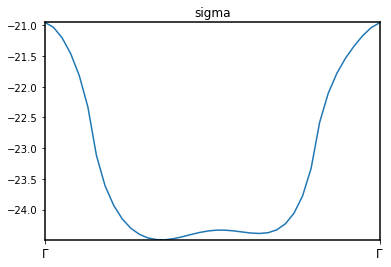

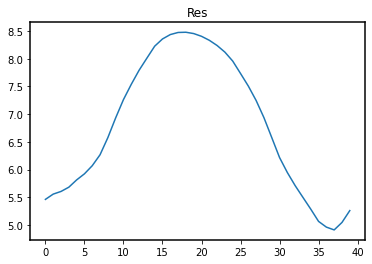

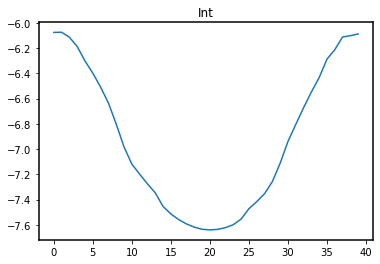

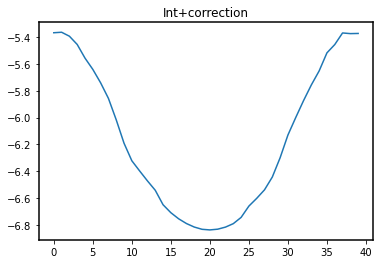

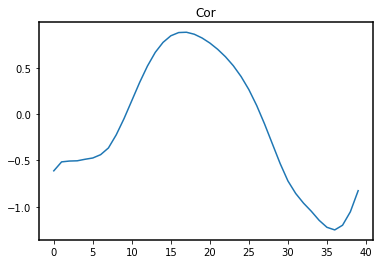

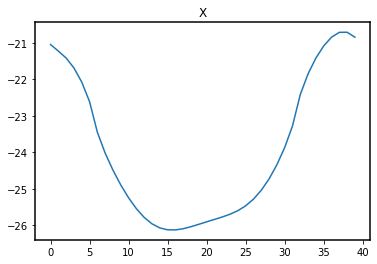

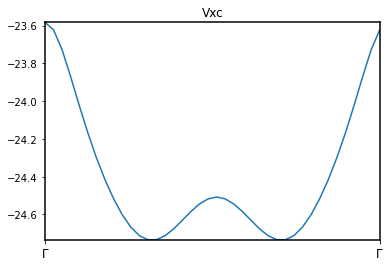

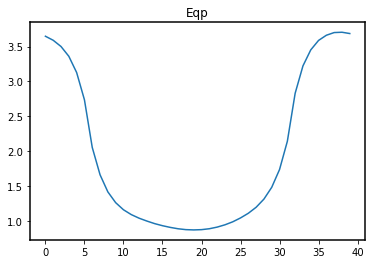

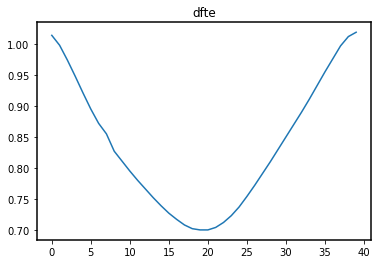

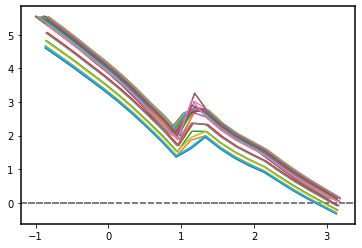

for solstat: n means number of solutions found, -1 means extrap-, -2 means extrap+, -3 means no sol
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 2. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1. -2.]
 [ 1.  1.]
 [-2.  1.]
 [ 1.  1.]]


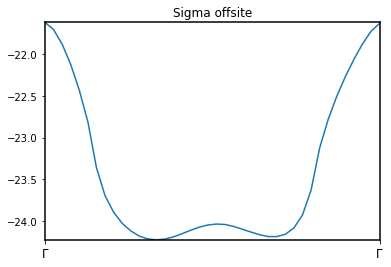

In [38]:
#maximum number of solutions
nsol=10
printb=0
Fr=np.zeros((nk,nfreq,nb))
Fi=np.zeros((nk,nfreq,nb))
inteqprt=np.zeros((nk,nb,nsol))
inteqpit=np.zeros((nk,nb,nsol))
inteqpr=np.zeros((nk,nb))
inteqpi=np.zeros((nk,nb))
solstat=np.zeros((nk,nb))-3
plt.title("sigma")
plt.plot(sigmarff[:,0,printb,5]+intcorrection[:,5,0,printb])
labid=[0,nk-1]
plt.xticks(labid,['$\mathrm{\Gamma}$','$\mathrm{\Gamma}$'],fontsize=12)
plt.axis([0,nk-1,np.min(sigmarff[:,0,printb,5]+intcorrection[:,5,0,printb]),np.max(sigmarff[:,0,printb,5]+intcorrection[:,5,0,printb])])
plt.show()
plt.title("Res")
plt.plot(Resr[:,0,printb,5])
plt.show()
plt.title("Int")
plt.plot(Intr[:,0,printb,5])
plt.show()
plt.title("Int+correction")
plt.plot(Intr[:,0,printb,5]+intcorrection[:,5,0,printb])
plt.show()
plt.title("Cor")
plt.plot(Corr[:,0,printb,5])
plt.show()
plt.title("X")
plt.plot(Xr[:,0,printb,5])
plt.show()
plt.title("Vxc")
plt.plot(vxc[:,printb])
labid=[0,nk-1]
plt.xticks(labid,['$\mathrm{\Gamma}$','$\mathrm{\Gamma}$'],fontsize=12)
plt.axis([0,nk-1,np.min(vxc[:,printb]),np.max(vxc[:,printb])])
plt.show()
plt.title("Eqp")
plt.plot(sigmarff[:,0,printb,5]+dfte[:,printb]+intcorrection[:,5,0,printb]-vxc[:,printb])
plt.show()
plt.title("dfte")
plt.plot(dfte[:,printb])
plt.show()
for i in range(nfreq):
    Fr[:,i,:]=dfte+sigmarff[:,0,:,i]-vxc-Ewff[:,0,:,i]+intcorrection[:,i,0,:]
    Fi[:,i,:]=Sigmai[:,0,:,i]
for ik in range(nk):
    for ib in range(nb):
        f=Fr[ik,:,ib]
        fi=Fi[ik,:,ib]
        Egrid=Ewff[ik,0,ib,:]
        isol=0
        havesol=False
        currentsol=20000
        if ib == 1:
            #plt.plot(Egrid,f+Ewff[ik,0,ib,:])
            plt.plot(Egrid,f)
        plt.axhline(0,linestyle="--",zorder=-1,color='tab:gray')
        for ifreq in range(nfreq-1):
            if f[ifreq]>0 and f[ifreq+1]<0:
                f1=abs(f[ifreq])
                f2=abs(f[ifreq+1])
                x1=Egrid[ifreq]
                x2=Egrid[ifreq+1]
                ttweight=f1+f2
                newsol=(x1*f2+x2*f1)/ttweight
                inteqprt[ik,ib,isol]=newsol
                inteqpit[ik,ib,isol]=fi[ifreq]*(x2-newsol)/(x2-x1)+fi[ifreq+1]*(newsol-x1)/(x2-x1)
                if ik>0:
                    #new interpolation scheme
                    if abs(newsol-inteqpr[ik-1,ib])<abs(currentsol-inteqpr[ik-1,ib]):
                    #old interpolation scheme
                    #if abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                        currentsol=newsol
                        currentsoli=inteqpit[ik,ib,isol]
                elif abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                    currentsol=newsol
                    currentsoli=inteqpit[ik,ib,isol]
                isol+=1
                havesol=True
        if havesol:
            solstat[ik,ib]=isol
        else:
            if f[0]<0 and f[1]<f[0]:
                f1=abs(f[0])
                f2=abs(f[1])
                x1=Egrid[0]
                x2=Egrid[1]
                newsol=(f1*x2-f2*x1)/(f1-f2)
                inteqprt[ik,ib,isol]=newsol
                inteqpit[ik,ib,isol]=fi[0]*(x2-newsol)/(x2-x1)+fi[1]*(newsol-x1)/(x2-x1)
                if ik>0 and solstat[ik-1,ib]==1:
                    #new interpolation scheme
                    if abs(newsol-inteqpr[ik-1,ib])<abs(currentsol-inteqpr[ik-1,ib]):
                    #old interpolation scheme
                    #if abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                        currentsol=newsol
                        currentsoli=inteqpit[ik,ib,isol]
                elif abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                    currentsol=newsol
                    currentsoli=inteqpit[ik,ib,isol]
                    solstat[ik,ib]=-1      
            elif f[-1]>0 and f[-2]>f[-1]:
                f1=abs(f[-2])
                f2=abs(f[-1])
                x1=Egrid[-2]
                x2=Egrid[-1]
                newsol=(f1*x2-f2*x1)/(f1-f2)
                inteqprt[ik,ib,isol]=newsol
                inteqpit[ik,ib,isol]=fi[-2]*(x2-newsol)/(x2-x1)+fi[-1]*(newsol-x1)/(x2-x1)
                if ik>0:
                    #new interpolation scheme
                    if abs(newsol-inteqpr[ik-1,ib])<abs(currentsol-inteqpr[ik-1,ib]):
                    #old interpolation scheme
                    #if abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                        currentsol=newsol
                        currentsoli=inteqpit[ik,ib,isol]
                        solstat[ik,ib]=-2
                elif abs(newsol-Egrid[onsiteidx])<abs(currentsol-Egrid[onsiteidx]):
                    currentsol=newsol
                    currentsoli=inteqpit[ik,ib,isol]
                    solstat[ik,ib]=-2     
            else:
                print("no solution")
        inteqpr[ik,ib]=currentsol
        inteqpi[ik,ib]=currentsoli
#print(inteqp[3])
plt.show()
print("for solstat: n means number of solutions found, -1 means extrap-, -2 means extrap+, -3 means no sol")
print(solstat)
plt.title("Sigma offsite")
plt.plot(inteqpr[:,printb]-dfte[:,printb]+vxc[:,printb])
labid=[0,nk-1]
plt.xticks(labid,['$\mathrm{\Gamma}$','$\mathrm{\Gamma}$'],fontsize=12)
plt.axis([0,nk-1,np.min(inteqpr[:,printb]-dfte[:,printb]+vxc[:,printb]),np.max(inteqpr[:,printb]-dfte[:,printb]+vxc[:,printb])])
plt.show()

## Plot out the results

<ipython-input-67-485cf00b3ff0>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('bandstructure.eps',fmt='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.8416793385859802


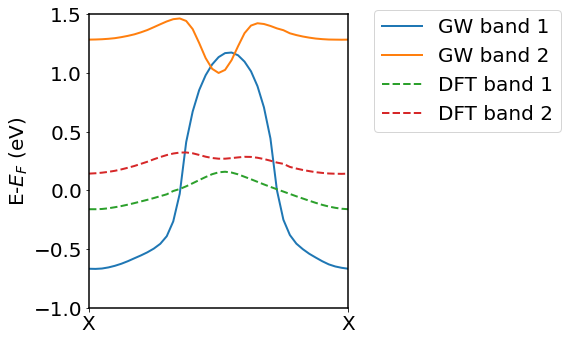

number of bands in file: 2
k is the kpoint list
all other varialbes have dim: nk*(nb*nspin)


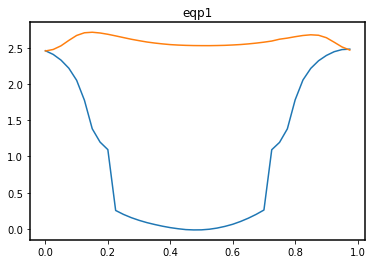

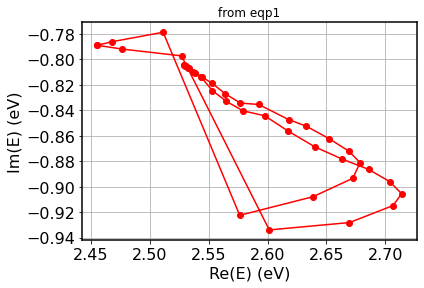

[7.23311478 7.29139038 7.35753578 7.43847325 7.53376095 7.61288515
 7.72854912 7.81950186 7.92160319 7.99764053 8.04738768 8.08108179
 8.10505301 8.1235022  8.13943611 8.15186117 8.16096223 8.16737679
 8.17126388 8.17197323 8.17037264 8.16527364 8.15801655 8.14662228
 8.12899362 8.10580444 8.07702845 8.0359836  7.97784676 7.89153887
 7.77939934 7.67142294 7.53544778 7.43603098 7.32289589 7.23262651
 7.17289404 7.14319391 7.1471544  7.18117438]
[6.92782325 6.89866182 6.82472127 6.72155332 6.62225587 6.56132718
 6.53970015 6.53984446 6.54931247 6.55965895 6.5675811  6.57270671
 6.57422552 6.57385582 6.57170772 6.56921975 6.56688123 6.56377627
 6.56107094 6.55891557 6.55814167 6.55945551 6.56165973 6.56580701
 6.57075633 6.57650744 6.58218526 6.58807746 6.59338821 6.59688675
 6.59371545 6.59224759 6.58486738 6.57808724 6.57803066 6.59976897
 6.65805976 6.75049433 6.84482623 6.90933563]
[2.97508292 2.91258391 2.82089996 2.69432918 2.51208423 2.25222232
 1.81213173 1.57690178 1.45107149 1.3

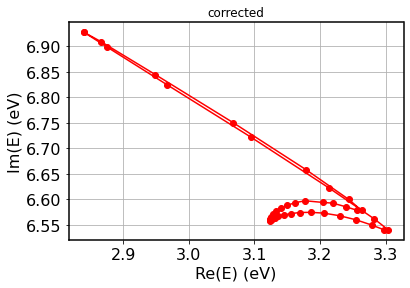

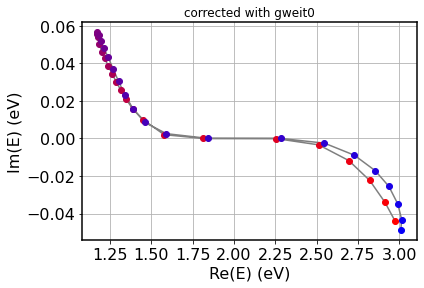

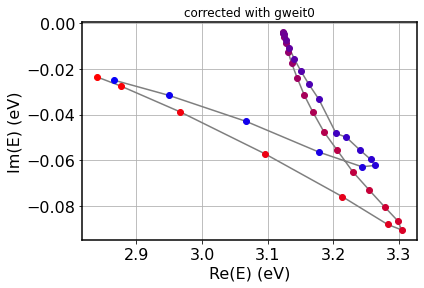

In [67]:
dk_vec = np.diff(k, axis=0)
dk_len = np.linalg.norm(dk_vec, axis=1)
kpath=np.insert(np.cumsum(dk_len), 0, 0.)
kpath=np.append(kpath,kpath[-1]+dk_len[0])
plt.figure(figsize=(12,6))
plt.subplots_adjust(left=0.4,bottom=0.2,right=0.7)
print(np.min(inteqpr)+0.6689)
for ib in range(nb):
    plt.plot(kpath,np.append(inteqpr[20:,ib],inteqpr[0:21,ib])[::-1]-1.8417,"-",label="GW band "+str(ib+1),lw=2)
for ib in range(nb):
    plt.plot(kpath,np.append(dftet[20:,ib],dftet[0:21,ib])[::-1]-0.8616,"--",label="DFT band "+str(ib+1),lw=2)
#plt.title("corrected")
plt.rc('axes',linewidth=1.5)
plt.legend(loc=[1.1,0.6],fontsize=20)
plt.axis([kpath[0],kpath[-1],-1,1.5])
plt.ylabel('E-$E_F$ (eV)',fontsize=20)
labid=[0,-1]
plt.xticks(kpath[labid],['$\mathrm{X}$','$\mathrm{X}$'],fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('bandstructure.eps',fmt='eps')
plt.show()
kpath=kpath[0:len(kpath)-1]
kgw,blabel,spinlabel,dftet,gwert,gweit=readeqpdat("converged/eqp1.dat")
for ib in range(nb):
    plt.plot(kpath,gwert[:,ib],label="from eqp1")
plt.title("eqp1")
plt.show()
for i in range(1,2):
    plt.plot(np.append(gwert[:,i],gwert[0,i]),np.append(gweit[:,i],gweit[0,i]),"ro-")
plt.title("from eqp1")
plt.xlabel("Re(E) (eV)",fontsize=16)
plt.ylabel("Im(E) (eV)",fontsize=16)
#plt.axis([3.18,3.7,-1.1,-0.88])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()
#shift imaginary part to set Im(E_f)=0
inteqpi=inteqpi+0.550044045
print(inteqpi[:,0])
print(inteqpi[:,1])
print(inteqpr[:,0])
print(inteqpr[:,1])
for i in range(1,2):
    plt.plot(np.append(inteqpr[:,i],inteqpr[0,i]),np.append(inteqpi[:,i],inteqpi[0,i]),"ro-")
    #plt.plot(np.append(inteqpr[:,i],inteqpr[0,i]),np.append(gweit0[:,i],gweit0[0,i]),"ro-")
plt.title("corrected")
plt.xlabel("Re(E) (eV)",fontsize=16)
plt.ylabel("Im(E) (eV)",fontsize=16)
#plt.axis([3.18,3.7,-1.1,-0.88])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()
for i in range(0,2):
    plt.plot(inteqpr[:,i],gweit0[:,i],'-',color='tab:gray')
    for j in range(nk):
        plt.plot(inteqpr[j,i],gweit0[j,i],"o-",color=((nk-j)/nk,0,j/nk))
    #plt.plot(np.append(inteqpr[:,i],inteqpr[0,i]),np.append(gweit0[:,i],gweit0[0,i]),"ro-")
    plt.title("corrected with gweit0")
    plt.xlabel("Re(E) (eV)",fontsize=16)
    plt.ylabel("Im(E) (eV)",fontsize=16)
    #plt.axis([3.18,3.7,-1.1,-0.88])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()
writeeqpdat("converged/iteration2/eqprc.dat",kgw,blabel,spinlabel,dfte,inteqpr,inteqpi)

## Read original eqp0 from 0th iteration and get the imaginary part

number of bands in file: 2
k is the kpoint list
all other varialbes have dim: nk*(nb*nspin)


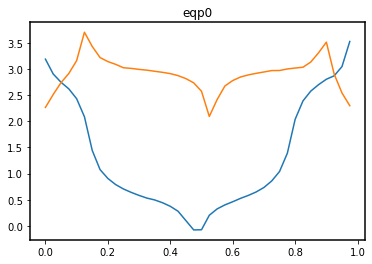

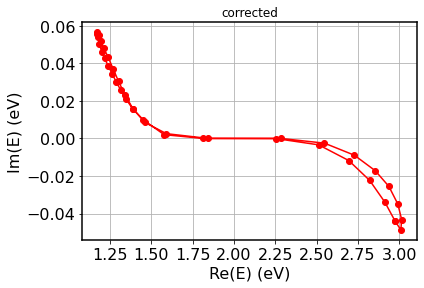

In [28]:
k,blabel,spinlabel,dftet,gwert,gweit0=readeqpdat("converged/eqp0.dat")
for ib in range(nb):
    plt.plot(kpath,gwert[:,ib],label="from eqp0")
plt.title("eqp0")
plt.show()
for i in range(0,1):
    plt.plot(np.append(inteqpr[:,i],inteqpr[0,i]),np.append(gweit0[:,i],gweit0[0,i]),"ro-")
    #plt.plot(np.append(inteqpr[:,i],inteqpr[0,i]),np.append(gweit0[:,i],gweit0[0,i]),"ro-")
plt.title("corrected")
plt.xlabel("Re(E) (eV)",fontsize=16)
plt.ylabel("Im(E) (eV)",fontsize=16)
#plt.axis([3.18,3.7,-1.1,-0.88])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

# Fit to wannier TB model

## construct wannier TB model from DFT

In [29]:
#This program calculate chiral-phase index from output of wannier.x
#input file: seedname_hr.dat
#!/home1/05497/tg847965/anaconda3/bin/python3
import numpy as np
import sys
import math

#####################define some useful function#####################
#non-hermitian case
def R2kHcplx(HRr,nk,klist,R):
    dim=np.shape(HRr[0])[0]
    HK=np.zeros((nk,dim,dim),dtype=complex)
#    klist=np.linspace(0,np.pi*2-np.pi*2/nk,nk)
    KRco=np.exp(1j*np.outer(klist,R))
    HK=np.tensordot(KRco,HRr,axes=1)
    printidx=2
    cross=True
    ekwandw=np.zeros((dim,nk),dtype=complex)
    wfccom=np.zeros((nk,dim,dim),dtype=complex)
    for i in range(nk):
#        ek,wfc=np.linalg.eigh(HK[i])
        ekdw1,wfcdw1=np.linalg.eig(HK[i])
        sortidx=np.argsort(ekdw1)
        ekdw=ekdw1[sortidx]
        wfcdw=wfcdw1[:,sortidx]
#        ekwan[:,i]=ek
        ekwandw[:,i]=ekdw
        wfccom[i,:,:]=wfcdw
        if cross==False:
                print("\n")
                for a in wfcdw[:,printidx]/wfcdw[2,printidx]*np.abs(wfcdw[2,printidx]):
                        print(f'{a:10.4f}',end='')
#        ekwandwr[i]=HKdw[i][2,2]
    return ekwandw,wfccom

#hermitian case
def R2kH(HRr,nk,klist,R):
    dim=np.shape(HRr[0])[0]
    HK=np.zeros((nk,dim,dim),dtype=complex)
    KRco=np.exp(1j*np.outer(klist,R))
    HK=np.tensordot(KRco,HRr,axes=1)
    printidx=3
    cross=True
    ekwandw=np.zeros((dim,nk))
    wfccom=np.zeros((nk,dim,dim),dtype=complex)
    for i in range(nk):
        ekdw,wfcdw=np.linalg.eigh(HK[i])
        ekwandw[:,i]=ekdw
        wfccom[i,:,:]=wfcdw
        if cross==False:
                print("\n")
                for a in wfcdw[:,printidx]/wfcdw[2,printidx]*np.abs(wfcdw[2,printidx]):
                        print(f'{a:10.4f}',end='')
    return ekwandw,wfccom

#reduce cell contained in HR, return dellist
def reduceR(HR):
    dellist=[]
    for i in range(len(HR)):
        if ((np.abs(HR[i])<0.0000001).all()):
                dellist=np.append(dellist,int(i))
    dellist=np.array(dellist,dtype=int)
    return dellist
##########end defining function part###########################


print('This program is only valid in 1D!!!')
pd=2
if pd==1:
        print('periodic direction is x')
if pd==2:
        print('periodic direction is y')
if pd==3:
        print('periodic direction is z')
#hr files from wannier90
hrfil='cognr_hr.dat'
#index list of A sublattice and B sublattice, can mean different things, used to reorder basis
Alist=[0,2,4,6,8,10]
Blist=[1,3,5,7,9,11]
#ignore matrix elements if its abs smaller than thre_tol
thr_tol=0.01
#number of k points to interpolate
nk=40
#change the unit cell move index catm atoms to new unit cell relative to the home unit cell
catm=np.array([0,1])
cunitcell=np.array([0,0])
###################################################input region ends
infilh=open(hrfil,'r').readlines()
#find the location where the matrix HR starts as istart
for i in range(3,len(infilh)):
        content=infilh[i].split()
        if len(content)==1:
                istart=i+1
                break
ndeg=int(infilh[2])
#get degeneracy of each cells
deg=[]
for i in range(3,istart):
        deg=np.append(deg,[int(aa) for aa in infilh[i].split()])
deg=np.array(deg)
print('number of wigner seitz cells:',ndeg)
dim=int(infilh[1])
print('dimension of hamiltonian:',dim)
#read HR
##############################################################
#construct and approximate HRr[cell,basis,basis] based on thr_tol
##############################################################
Rlist=np.zeros((ndeg,3))
HR=np.zeros((ndeg,dim,dim),dtype=complex)
for i in range(istart,len(infilh)-istart,dim**2):
        l=int((i-istart)/dim**2)
        content=infilh[i].split()
        Rlist[l]=np.array([int(aa) for aa in content[0:3]])
        for j in range(i,i+dim**2):
                hcont=infilh[j].split()
                indr=int(hcont[3])-1
                indc=int(hcont[4])-1
                eleHR=complex(float(hcont[5]),float(hcont[6]))
                if abs(eleHR)>thr_tol:
                        HR[l,indr,indc]=eleHR
#reduce HR to smaller matrix, get rid of zero matrix: HR[R]
dellist=reduceR(HR)
degr=np.delete(deg,dellist)
HRr=np.delete(HR,dellist,axis=0)
Rlistr=np.delete(Rlist,dellist,axis=0)
R=Rlistr[:,pd-1]
ndegr=len(degr)
print('reduced H includes',ndegr,'cells now.')
print("R:",R)
for i in range(ndegr):
        HRr[i]=HRr[i]/degr[i]
#construct hamiltonian in reciprocal space
#Now we want to reorder the basis to seperate up(Alist) and dw(Blist)
HRrp=np.copy(HRr)
HRrp[:,0:int(dim/2),:]=np.copy(HRr[:,Alist,:])
HRrp[:,int(dim/2):dim,:]=np.copy(HRr[:,Blist,:])
HRrpp=np.copy(HRrp)
HRrpp[:,:,0:int(dim/2)]=np.copy(HRrp[:,:,Alist])
HRrpp[:,:,int(dim/2):]=np.copy(HRrp[:,:,Blist])
HRr=np.copy(HRrpp)
# Now further ignore some small hoppings
for i in range(ndegr):
    for j in range(dim):
        for l in range(dim):
            if abs(HRr[i,j,l])<0.0:
                HRr[i,j,l]=0
#get only spindw part
HRrd=np.copy(HRr[:,int(dim/2):,int(dim/2):])
#delete first basis
HRrd=np.delete(np.delete(HRrd,[0],axis=1),[0],axis=2)
#reduce HRrd to smaller matrix, get rid of zero matrix: HR[R]
dellist=reduceR(HRrd)
degr=np.delete(degr,dellist)
HRrd=np.delete(HRrd,dellist,axis=0)
Rlistr=np.delete(Rlistr,dellist,axis=0)
R=Rlistr[:,pd-1]
ndegr=len(degr)
print('reduced HRrd includes',ndegr,'cells now.')
print("R:",R)
#############################################################################
#from HRr construct Hk
#############################################################################
#starting from Gamma
klist=np.linspace(0,2*np.pi-np.pi*2/nk,nk)
#starting from X
#klist=np.linspace(-np.pi,np.pi-np.pi*2/nk,nk)
ekwandw,wfccom=R2kH(HRrd,nk,klist,R)

This program is only valid in 1D!!!
periodic direction is y
number of wigner seitz cells: 31
dimension of hamiltonian: 12
reduced H includes 7 cells now.
R: [-3. -2. -1.  0.  1.  2.  3.]
reduced HRrd includes 5 cells now.
R: [-2. -1.  0.  1.  2.]


## Plot bands

[[ 0.        -2.2881767  0.       ]
 [ 0.        -2.1966496  0.       ]
 [ 0.        -2.1051225  0.       ]
 [ 0.        -2.0135955  0.       ]
 [ 0.        -1.9220684  0.       ]
 [ 0.        -1.8305413  0.       ]
 [ 0.        -1.7390143  0.       ]
 [ 0.        -1.6474872  0.       ]
 [ 0.        -1.5559601  0.       ]
 [ 0.        -1.4644331  0.       ]
 [ 0.        -1.372906   0.       ]
 [ 0.        -1.2813789  0.       ]
 [ 0.        -1.1898519  0.       ]
 [ 0.        -1.0983248  0.       ]
 [ 0.        -1.0067977  0.       ]
 [ 0.        -0.9152707  0.       ]
 [ 0.        -0.8237436  0.       ]
 [ 0.        -0.7322165  0.       ]
 [ 0.        -0.6406895  0.       ]
 [ 0.        -0.5491624  0.       ]
 [ 0.        -0.4576353  0.       ]
 [ 0.        -0.3661083  0.       ]
 [ 0.        -0.2745812  0.       ]
 [ 0.        -0.1830541  0.       ]
 [ 0.        -0.0915271  0.       ]
 [ 0.         0.         0.       ]
 [ 0.         0.0915271  0.       ]
 [ 0.         0.1830541  0. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


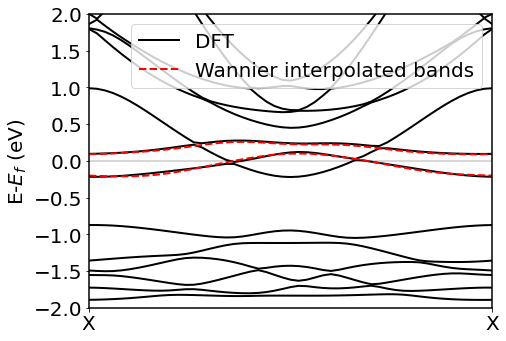

0.1261+0.0000j0.0014+0.8830j0.0341-0.0000j-0.0007-0.4498j-0.0307-0.0000j

0.0202+0.0000j0.0092+0.8887j0.0781-0.0008j-0.0047-0.4511j0.0091-0.0002j

0.0824+0.0000j0.0022-0.8819j-0.1214-0.0004j-0.0011+0.4458j-0.0454-0.0000j

0.1672+0.0000j0.0010-0.8668j-0.1653-0.0002j-0.0005+0.4337j-0.0721-0.0000j

0.2295+0.0000j0.0007-0.8500j-0.2095-0.0002j-0.0003+0.4161j-0.0886-0.0000j

0.2705+0.0000j0.0005-0.8357j-0.2524-0.0002j-0.0002+0.3939j-0.0973-0.0000j

0.2929+0.0000j0.0005-0.8266j-0.2923-0.0002j-0.0002+0.3678j-0.1012-0.0000j

0.2987+0.0000j0.0004-0.8239j-0.3273-0.0002j-0.0001+0.3381j-0.1024-0.0000j

0.2901+0.0000j0.0004-0.8284j-0.3549-0.0002j-0.0001+0.3054j-0.1024-0.0000j

0.2694+0.0000j0.0004-0.8399j-0.3725-0.0002j-0.0001+0.2700j-0.1018-0.0000j

0.2403+0.0000j0.0005-0.8576j-0.3773-0.0002j-0.0001+0.2331j-0.1008-0.0000j

0.2068+0.0000j0.0005-0.8798j-0.3674-0.0002j-0.0001+0.1962j-0.0991-0.0000j

0.1726+0.0000j0.0006-0.9042j-0.3424-0.0002j-0.0001+0.1616j-0.0962-0.0000j

0.1396+0.0000j0.0007-0.9285j

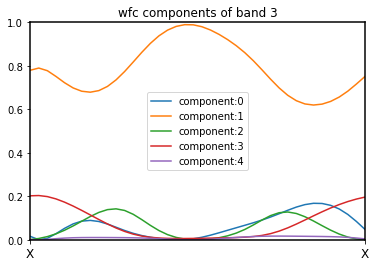

In [98]:
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import re
import math
import scipy
from scipy import optimize
from scipy.optimize import minimize
import cmath
infil='bandsout'
filtype='bands'
degeflag=0
flags=0
flage=0
flag=0
ef=0
##we will plot the last bandstructure data output by the infil
opfil=open(infil,'r').readlines()
#we get the last bandstructure data output by the infil
if filtype == 'bands':
    for i in range(len(opfil)-1):
        if 'End of band structure calculation' in opfil[i]:
            istart=i+2
            flags=1
        if 'Writing output data file' in opfil[i]:
            iend=i+3
            flage=1
        if (flags==1)&(flage==1):
            bnd=opfil[istart:iend]
            flags=0
            flage=0
            flag=1
        if 'number of k points=' in opfil[i]:
            numk=int(opfil[i].split()[4])
            kpf=np.zeros((numk,3))
            for j in range(numk):
                kpf[j]=np.array([float(aa) for aa in opfil[i+j+2].split(')')[1].split()[2:5]])
else:
    for i in range(len(opfil)-1):
        if 'End of self-consistent calculation' in opfil[i]:
            istart=i+2
            flags=1
        if '!' in opfil[i]:
            iend=i-1
            flage=1
        if (flags==1)&(flage==1):
            bnd=opfil[istart:iend]
            flag=1
            flags=0
            flage=0
        if 'number of k points=' in opfil[i]:
            numk=int(opfil[i].split()[4])
            kpf=np.zeros((numk,3))
            for j in range(numk):
                kpf[j]=np.array([float(aa) for aa in opfil[i+j+2].split(')')[1].split()[2:5]])
#postprocess
#check if flag=0
if (flag != 1):
    print('error in reading bandstructure data')
    exit(1)
kp=np.ndarray(0)
bdata1=[]
jbnd=[]
for i in range(len(bnd)):
    bdata=bnd[i]
    if 'k' in bdata:
        jbnd=np.append(jbnd,i+2)
        for midata in bdata.split():
            if '-' in midata:
                midsplit=re.split('([-])',midata)
                for i in range(len(midsplit)):
                    if '-' in midsplit[i]:
                        bdata1=np.append(bdata1,midsplit[i]+midsplit[i+1])
                    else:
                        bdata1=np.append(bdata1,midsplit[i])
            else:
                bdata1=np.append(bdata1,midata)
        kp=np.append(kp,bdata1[2:5])
        bdata1=[]
    if 'Fermi' in bdata:
        jbnd=np.append(jbnd,i+2)
        ef=float(bdata.split()[4])
        break
    elif 'Writing output data file' in bdata:
        jbnd=np.append(jbnd,i+2)
    
##check kp
#print(kp)
#rearange kp
print(kpf)
print('number of kpoints:', len(kpf))
dk_vec = np.diff(kpf, axis=0)
dk_len = np.linalg.norm(dk_vec, axis=1)
k=np.insert(np.cumsum(dk_len), 0, 0.)
#rescale the k point is left empty for future coding

ek1=[]
ek=[]
jbnd=jbnd.astype(int)
#get bandstructure data
knum=int(len(kpf))
for i in range(knum):
    ek1=np.append(ek1,bnd[jbnd[i]:(jbnd[i+1]-3)])
for i in range(len(ek1)):
    ek=np.append(ek,ek1[i].split())
nbnd=int(len(ek)/knum)
ek=ek.reshape(knum,nbnd).astype(float)
'''
######check if degenaracy exists
for i in range(knum):
    for j in range(nbnd-1):
        if ek[i,j]==ek[i,j+1]:
            print('degenaracy detected at', k[i])
            print('energy=',ek[i,j],'and',ek[i,j+1])
            print('bandnumber is ',j+1)
            degeflag=1
if degeflag==0:
    print('no degenarate bands found')
'''
#arrange ek into new array with first index representing bndnum and second index representing k points
ek=ek.T#-ef
print('fermi energy:',ef)
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.2,bottom=0.2)
####################################
#plot out bands
####################################
for i in range(nbnd):
    dft,=plt.plot(k, ek[i]+3.12, 'k-', lw=2,label="DFT")
print("dim=",dim)
print("number of band from TB model:",len(ekwandw))
for j in range(2,4):
    print("nk:",nk)
    wan,=plt.plot(np.linspace(0,k[-1],nk+1),3.12+np.append(ekwandw[j,20:],ekwandw[j,0:21]),'r--',lw=2,label="Wannier interpolated bands")
plt.rc('axes',linewidth=1.5)
#plt.plot(np.linspace(0,k[-1],nk),ekwandwr,'ko',lw=1)
plt.legend(handles=[dft,wan],fontsize=20)
plt.axis([k[0],k[-1],-2,2])
#plt.title('bandstructure')
plt.axhline(0, color='#cccccc', zorder=-10)
labid=[0,-1]
plt.xticks(k[labid],['$\mathrm{X}$','$\mathrm{X}$'],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('E-$E_f$ (eV)',fontsize=20)
#plt.xlabel('k',fontsize=16)
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.savefig('bandstructure.eps',format='eps')
plt.show()
####analyze wfc
printidx=2
for j in range(nk):
    for a in wfccom[j,:,printidx]/wfccom[j,0,printidx]*np.abs(wfccom[j,0,printidx]):
            print(f'{a:10.4f}',end='')
    print("\n")
for i in range(np.shape(wfccom)[1]):
    plt.plot(np.linspace(0,k[-1],nk),np.abs(wfccom[:,i,printidx])**2,label="component:"+str(i))
plt.title("wfc components of band "+str(printidx+1))
plt.axis([0,k[-1],0,1])
labid=[0,-1]
plt.xticks(k[labid],['$\mathrm{X}$','$\mathrm{X}$'],fontsize=12)
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40


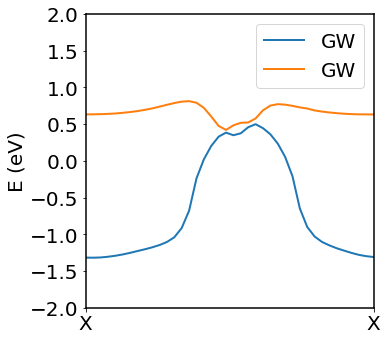

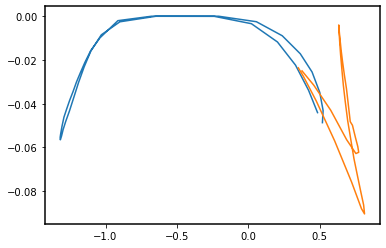

In [31]:
#fitting band index
fitband=[2,3]
#shift real and imaginary part of the target bands
print(nk)
targetband=np.zeros((len(fitband),nk))
targetbandi=np.zeros((len(fitband),nk))
smtargetband=inteqpr.T-np.mean(inteqpr[:,:])
smtargetbandi=-np.abs(gweit0.T)
for i in range(nk):
    if inteqpr[i,0]<inteqpr[i,1]:
        targetband[0,i]=inteqpr[i,0]-np.mean(inteqpr[:,:])
        targetbandi[0,i]=-np.abs(gweit0[i,0])
        targetband[1,i]=inteqpr[i,1]-np.mean(inteqpr[:,:])
        targetbandi[1,i]=-np.abs(gweit0[i,1])
    else:
        targetband[0,i]=inteqpr[i,1]-np.mean(inteqpr[:,:])
        targetbandi[0,i]=-np.abs(gweit0[i,1])
        targetband[1,i]=inteqpr[i,0]-np.mean(inteqpr[:,:])
        targetbandi[1,i]=-np.abs(gweit0[i,0])

#################################################
targetxstart=np.copy(targetband)
targetxstart[:,0:20]=targetband[:,20:]
targetxstart[:,20:]=targetband[:,0:20]
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.4,bottom=0.2)
#plt.plot(np.append(klist,np.pi*2),np.append(ekwandw[2],ekwandw[2,0])-ekwandw[2,0],lw=2,label="DFT")
for i in range(len(fitband)):
    plt.plot(np.append(klist,np.pi*2),np.flip(np.append(targetxstart[i],targetxstart[i,0])),lw=2,label="GW")
plt.legend(fontsize=20)
plt.rc('axes',linewidth=1.5)
#plt.title('GW calculation changes the band shape',fontsize=20)
#plt.axhline(-0.032, color='#cccccc', zorder=-10)
#plt.axhline(-0.0339, color='#cccccc', zorder=-10)
plt.axis([klist[0],klist[-1],-2,2])
#plt.xlim(0,0.5)
#plt.ylim(-5.65,-5.5)
#plt.xlabel('k',fontsize=16)
plt.ylabel('E (eV)',fontsize=20)
labid=[0,-1]
plt.xticks(klist[labid],['$\mathrm{X}$','$\mathrm{X}$'],fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('GW-DFT.eps')
plt.show()
for i in range(len(fitband)):
    plt.plot(smtargetband[i],smtargetbandi[i])
plt.show()

## fit the bands step by step

### shift and scale the H

fitting with  5 bases
scale: 5.1377393473541035
error: 21.180845595906938


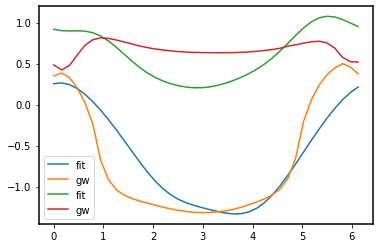

In [32]:
import scipy
from scipy import optimize
from scipy.optimize import minimize
dimfit=np.shape(HRrd)[1]
print("fitting with ",dimfit, "bases")
def func(w):
    efit=w*(ekwandw[fitband]-np.mean(ekwandw[fitband]))
    return np.sum(np.abs(efit-targetband))
w0=1
sol=minimize(lambda w:func(w),w0,tol=1e-9)
scale=sol.x[0]
print("scale:",scale)
print("error:",func(sol.x))
Hcurrent=np.copy(HRrd)
Ridx=np.argwhere(R==0)
Hcurrent[Ridx]=Hcurrent[Ridx]-np.eye(dimfit)*np.mean(ekwandw[fitband])
Hcurrent=Hcurrent*scale
ekfit,wfccomfit=R2kH(Hcurrent,nk,klist,R)
for i in range(len(fitband)):
    plt.plot(klist,ekfit[fitband[i]],label="fit")
    plt.plot(klist,targetband[i],label="gw")
plt.legend()

### fit some important parameters (assuming hermitian H)

Hcurrent: [[[ 8.10478382e-02-8.59030019e-03j  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    1.08971452e-01-3.06209265e-03j]
  [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   -9.07324769e-02-1.22175442e-02j -9.33270352e-02-8.37965288e-03j
   -1.05277417e-01-1.75505176e-02j]
  [ 0.00000000e+00+0.00000000e+00j  9.07273391e-02+1.22175442e-02j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    5.48607808e-02+2.34280914e-03j]
  [ 0.00000000e+00+0.00000000e+00j -9.33321730e-02-8.37965288e-03j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j]
  [ 1.08950901e-01-3.06209265e-03j  1.05272279e-01+1.75505176e-02j
    5.48505053e-02+2.33767140e-03j  0.00000000e+00+0.00000000e+00j
   -7.20876208e-02+1.38102434e-02j]]

 [[ 2.71431907e-01-1.71600494e-03j  1.76286112e-01-8.12790365e-03j
    3.40179998e-01-1.72782174e-02j  1.98840788e-01-2.20100754e-02j
    

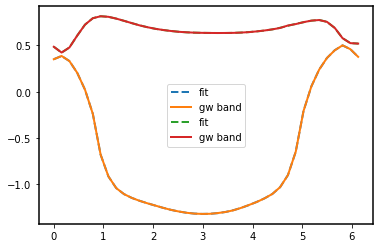

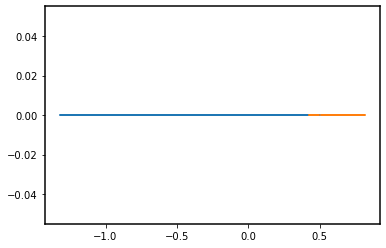

In [15]:
def Hermit(w,dim):
    ncell=len(w)//dim**2
    #print("hopping parameters contains:",ncell,"cells(including zero cell)")
    Hback=w.reshape(ncell,dim,dim)
    H=np.zeros((ncell+ncell-1,dim,dim),dtype=complex)
    H[0:ncell]=Hback
    for i in range(ncell,ncell+ncell-1):
        H[i]=H[2*ncell-2-i].conjugate().T
    for i in range(dimfit):
        H[ncell-1][i][i]=H[ncell-1][i][i].real
    for i in range(dimfit):
        for j in range(i+1,dimfit):
            H[ncell-1][i][j]=H[ncell-1][j][i].conjugate()
    return H
   # j=0
   ## for i in range(dim):
    #    H[1,i,i:]=w[j:j+dim-i]
    #    j+=dim-i
    #for i in range(dim):
    #    H[2,i,:]=w[j:j+dim]
    #    j+=dim
    #H[0]=H[2].conjugate().T
    #H[1]=H[1]+H[1].conjugate().T
    #for i in range(dim):
    #    H[1,i,i]=H[1,i,i]/2
    #return H
def Hermit2par(Hhermit):
    #j=0
    dim=np.shape(Hhermit)[1]
    ncell=(len(Hhermit)+1)//2
    wcplx=Hhermit[0:ncell].flatten()#np.zeros(dim**2+int((dim+1)*dim/2),dtype=complex)
    #for i in range(dim):
    #    wcplx[j:j+dim-i]=Hhermit[1,i,i:]
    #    j+=dim-i
    #for i in range(dim):
    #    wcplx[j:j+dim]=Hhermit[2,i,:]
    #    j+=dim
    #print("j=",j)
    return wcplx
def func(w):
    wr=w[0:int(len(w)/2)]
    wi=w[int(len(w)/2):]
    wcplx=wr+1j*wi
    wmatrix=Hermit(wcplx,dimfit)
    ekfit,wfccomfit=R2kH(wmatrix,nk,klist,R)
    return np.mean(np.abs(ekfit[fitband]-targetband)**2)#+0.0001*np.mean(np.abs(wfccomfit[:,:,fitband]-wfccom[:,:,fitband])**2)
w00=Hermit2par(Hcurrent)
print("Hcurrent:",Hcurrent)
w0=np.concatenate((w00.real,w00.imag))
print("inital hoppings:",w0)
sol=minimize(lambda w:func(w),w0,tol=1e-10)
print("final hoppings:",sol.x)
print("error:",func(sol.x))
wcplx=sol.x[0:int(len(sol.x)/2)]+1j*sol.x[int(len(sol.x)/2):]
whmatrix=Hermit(wcplx,dimfit)
ekfit,wfchcomfit=R2kH(whmatrix,nk,klist,R)
for i in range(len(fitband)):
    plt.plot(klist,ekfit[fitband[i],:],"--",lw=2,label="fit")
    plt.plot(klist,targetband[i],lw=2,label="gw band")
plt.legend()
plt.show()
for i in range(len(fitband)):
    plt.plot(ekfit[fitband[i],:].real,ekfit[fitband[i],:].imag)
plt.show()

### now fit the non-hermitian part

[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1

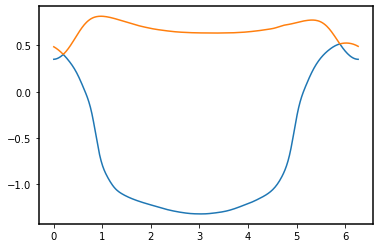

-1.31798555719363


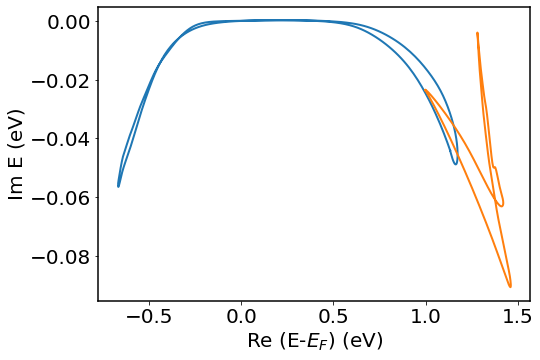

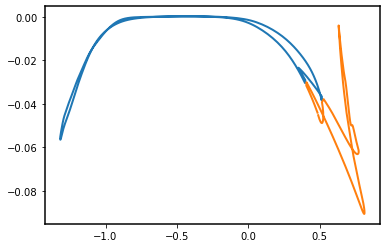

targetband: [[ 0.34976258  0.38517297  0.33033043  0.20375965  0.0215147  -0.23834721
  -0.6784378  -0.91366776 -1.03949805 -1.10427484 -1.14513837 -1.17683328
  -1.20338599 -1.22751256 -1.2521098  -1.27380706 -1.29143419 -1.30520816
  -1.31461023 -1.3177902  -1.31658137 -1.30860735 -1.29708255 -1.27915544
  -1.25270033 -1.22170567 -1.18941223 -1.15002114 -1.10292847 -1.02945176
  -0.89958291 -0.64790417 -0.20775811  0.0563589   0.2374259   0.36365661
   0.44618587  0.50014431  0.45840146  0.37586284]
 [ 0.48451338  0.42201438  0.47643213  0.60461205  0.72299828  0.79219995
   0.81357542  0.80736726  0.78819473  0.76414684  0.73924395  0.71496325
   0.69530995  0.67831118  0.66543313  0.65470192  0.64586935  0.64043914
   0.63662426  0.63452417  0.6334583   0.63261502  0.63333419  0.63421972
   0.637533    0.64238046  0.65019869  0.65986675  0.67205519  0.68722726
   0.71362538  0.72909961  0.74971939  0.76633577  0.77280129  0.75311622
   0.68813366  0.57693442  0.52357181  0.51866997

NameError: name 'whmatrix' is not defined

In [74]:
from scipy.interpolate import interp1d
#targetbandisym=np.copy(targetbandi)
#targetbandisym[21:]=np.copy(targetbandi[19:0:-1])
#targetbandsym=np.copy(targetband)
#targetbandsym[21:]=np.copy(targetband[19:0:-1])
#you can choose to fit symmetric band or original band
densk=np.linspace(0,2*np.pi-2*np.pi/400,400)
#please distinguish smtargetband* and targetband*, sm means connect bands in a smooth way, targetband order band based on eigenvalue only
funcr=interp1d(np.append(klist,2*np.pi),np.append(smtargetband,smtargetband[:,0].reshape((2,1)),axis=1),"cubic")
funci=interp1d(np.append(klist,2*np.pi),np.append(smtargetbandi,smtargetbandi[:,0].reshape((2,1)),axis=1),"cubic")
smtargetbanddense=funcr(densk)
smtargetbandidense=funci(densk)
sortidx=np.argsort(smtargetbanddense,axis=0)
print(sortidx)
targetbanddense=np.take_along_axis(smtargetbanddense,sortidx,axis=0)
targetbandidense=np.take_along_axis(smtargetbandidense,sortidx,axis=0)
for i in range(len(fitband)):
    plt.plot(densk,targetbanddense[i])
plt.show()
plt.figure(figsize=(12,6))
plt.subplots_adjust(left=0.4,bottom=0.2)
for i in range(len(fitband)):
    plt.plot(np.append(smtargetbanddense[i],smtargetbanddense[i,0])+0.6491,np.append(smtargetbandidense[i],smtargetbandidense[i,0]),"-",lw=2)

plt.rc('axes',linewidth=1.5)
#plt.legend(loc=[1.1,0.6],fontsize=20)
plt.xlabel('Re (E-$E_F$) (eV)',fontsize=20)
plt.ylabel('Im E (eV)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('cplxbnd.eps')
print(np.min(smtargetbanddense[0]))
plt.show()
for i in range(len(fitband)):
    plt.plot(targetbanddense[i],targetbandidense[i],"-",lw=2)
plt.show()
def func(w):
    wr=w[0:int(len(w)/2)]
    wi=w[int(len(w)/2):]
    wcplx=wr+1j*wi
    wmatrix=wcplx.reshape((len(R),dimfit,dimfit))
    #ekfit,wfccomfit=R2kHcplx(wmatrix,nk,klist,R)
    ekfit,wfccomfit=R2kHcplx(wmatrix,len(densk),densk,R)
    return 1*np.sum(np.abs(ekfit[fitband,0:len(densk)//40*3].real-targetbanddense[:,0:len(densk)//40*3])**2)\
    +20*np.sum(np.abs(ekfit[fitband,len(densk)//40*3:len(densk)//5].real-targetbanddense[:,len(densk)//40*3:len(densk)//5])**2)\
    +1*np.sum(np.abs(ekfit[fitband,len(densk)//5:len(densk)//5*4].real-targetbanddense[:,len(densk)//5:len(densk)//5*4])**2)\
    +20*np.sum(np.abs(ekfit[fitband,len(densk)//5*4:len(densk)//40*37].real-targetbanddense[:,len(densk)//5*4:len(densk)//40*37])**2)\
    +1*np.sum(np.abs(ekfit[fitband,len(densk)//40*37:].real-targetbanddense[:,len(densk)//40*37:])**2)\
    +1*np.sum(np.abs(ekfit[fitband,0:len(densk)//40*3].imag-targetbandidense[:,0:len(densk)//40*3])**2)\
    +40*np.sum(np.abs(ekfit[fitband,len(densk)//40*3:len(densk)//5].imag-targetbandidense[:,len(densk)//40*3:len(densk)//5])**2)\
    +1*np.sum(np.abs(ekfit[fitband,len(densk)//5:len(densk)//5*4].imag-targetbandidense[:,len(densk)//5:len(densk)//5*4])**2)\
    +40*np.sum(np.abs(ekfit[fitband,len(densk)//5*4:len(densk)//40*37].imag-targetbandidense[:,len(densk)//5*4:len(densk)//40*37])**2)\
    +1*np.sum(np.abs(ekfit[fitband,len(densk)//40*37:].imag-targetbandidense[:,len(densk)//40*37:])**2)\
    #+0.0000001*np.sum(np.abs(wfccomfit[:,:,fitband]-wfccom[:,:,fitband])**2)
    #return np.sum(np.abs(ekfit[fitband].T.real-targetbandsym)**2)+1*np.sum(np.abs(ekfit[fitband].T.imag-targetbandisym)**2)+0.00001*np.sum(np.abs(wfccomfit[:,:,fitband]-wfccom[:,:,fitband])**2)
#w00=[]
#kconv=[0,1,2,3,6,7,8,9,10,11,12,13,14,18,19]
print("targetband:",targetband)
print("targetbandi:",targetbandi)
#for i in range(len(R)):
#    w00=np.concatenate((w00,scale[0]*(HRrd[i]+np.eye(5)*scale[1]).flatten()),axis=0)
#w0=np.concatenate((w00.real,w00.imag))
w0=np.concatenate((whmatrix.real.flatten(),whmatrix.imag.flatten()))+np.random.randn(len(R)*dimfit*dimfit*2)*0.00002
print("initial hoppings:",w0)
#adjust tol to prevent overfit
sol=minimize(lambda w:func(w),w0,tol=1e-10)
while(func(sol.x)>1000.2):
    sol=minimize(lambda w:func(w),sol.x+np.random.randn(len(R)*dimfit*dimfit*2)*0.002,tol=1e-10)
print("final hoppings:",sol.x)
print("error:",func(sol.x))
'''
wcplx=sol.x[0:int(len(sol.x)/2)]+1j*sol.x[int(len(sol.x)/2):]
wmatrix=wcplx.reshape((len(R),dimfit,dimfit))
ekfit,wfccomfit=R2kHcplx(wmatrix,len(densk),densk,R)
for i in range(len(fitband)):
    plt.plot(densk,ekfit[fitband[i],:].real,"--",lw=2,label="fit")
    plt.plot(densk,targetbanddense[i],lw=2,label="gw band")
plt.legend()
plt.show()
for i in range(len(fitband)):
    plt.plot(ekfit[fitband[i],:].real,ekfit[fitband[i],:].imag,'r-',lw=1.5)
#plt.plot(ekfit[fitband[0],:].real,ekfit[fitband[0],:].imag,'ro-',lw=1.5)
#plt.plot(ekfit[fitband[1],:].real,ekfit[fitband[1],:].imag,'b-',lw=1.5)
plt.show()
for i in range(len(fitband)):
    plt.plot(targetbanddense[i],targetbandidense[i],'bo-',markersize=0.1)
plt.axis([0.2,0.55,-0.06,-0.02])
#plt.plot(targetbandsym,targetbandisym,'bo-')
'''

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


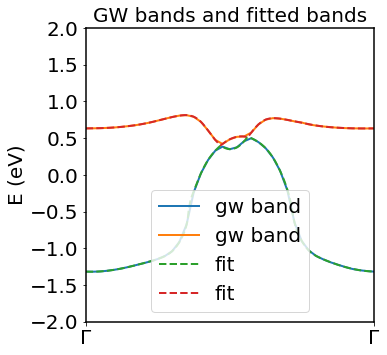

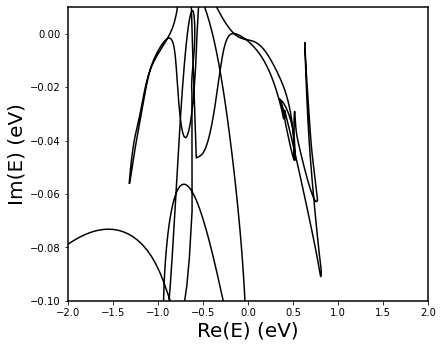

"\nplt.figure(figsize=(10,6))\nplt.subplots_adjust(left=0.4,bottom=0.2)\nplt.plot(np.append(targetband,targetband[0]),-np.abs(np.append(gweit0[:,0],gweit0[0,0])),'k-',lw=1.5)\nplt.ylabel('Im(E) (eV)',fontsize=20)\nplt.xlabel('Re(E) (eV)',fontsize=20)\n#plt.axis([-0.4,0.3,-1.15,-0.7])\nplt.savefig('cplxEraw.eps')\nprint(np.append(targetband,targetband[0]))\nprint(np.append(inteqpi[:,1],inteqpi[0,1]))\n"

In [170]:
wmatrix1=np.copy(wmatrix)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrix1,1001,kinter,R)
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.4,bottom=0.2)
for i in range(len(fitband)):
    plt.plot(np.append(klist-np.pi,np.pi),np.flip(np.append(targetxstart[i],targetxstart[i,0])),lw=2,label="gw band")
for i in range(len(fitband)):
    plt.plot(kinter,np.flip(ekfit[fitband[i],:].real),"--",lw=2,label="fit")
plt.legend(fontsize=20)
plt.rc('axes',linewidth=1.5)
plt.title('GW bands and fitted bands',fontsize=20)
#plt.axhline(-0.032, color='#cccccc', zorder=-10)
#plt.axhline(-0.0339, color='#cccccc', zorder=-10)
plt.axis([kinter[0],kinter[-1],-2,2])
#plt.xlim(0,0.5)
#plt.ylim(-5.65,-5.5)
#plt.xlabel('k',fontsize=16)
plt.ylabel('E (eV)',fontsize=20)
labid=[0,-1]
plt.xticks(kinter[labid],['$\mathrm{\Gamma}$','$\mathrm{\Gamma}$'],fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('conduction.eps')
plt.show()
plt.figure(figsize=(10,6))
plt.subplots_adjust(left=0.4,bottom=0.2)
for i in range(dimfit):
    plt.plot(ekfit[i,:].real,ekfit[i,:].imag,'k-',lw=1.5)
plt.axis([-2,2,-0.1,0.01])
plt.ylabel('Im(E) (eV)',fontsize=20)
plt.xlabel('Re(E) (eV)',fontsize=20)
plt.savefig('cplxE.eps')
plt.show()
'''
plt.figure(figsize=(10,6))
plt.subplots_adjust(left=0.4,bottom=0.2)
plt.plot(np.append(targetband,targetband[0]),-np.abs(np.append(gweit0[:,0],gweit0[0,0])),'k-',lw=1.5)
plt.ylabel('Im(E) (eV)',fontsize=20)
plt.xlabel('Re(E) (eV)',fontsize=20)
#plt.axis([-0.4,0.3,-1.15,-0.7])
plt.savefig('cplxEraw.eps')
print(np.append(targetband,targetband[0]))
print(np.append(inteqpi[:,1],inteqpi[0,1]))
'''

## store matrix to file

In [131]:
#store matrix to file
wmatrixfinal=np.copy(whmatrix)
print(np.shape(whmatrix))
outfil=open("whmatrixfile2bandssm","w")
for i in range(len(R)):
    for j in range(dimfit):
        outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(wmatrixfinal[i,j,0],wmatrixfinal[i,j,1],wmatrixfinal[i,j,2],wmatrixfinal[i,j,3],wmatrixfinal[i,j,4]))
        #outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(wmatrixfinal[i,j,0],wmatrixfinal[i,j,1],wmatrixfinal[i,j,2],wmatrixfinal[i,j,3]))
outfil.close()

(5, 5, 5)


# if you only want to do a finite segment calculation, you can define some parameters here without doing the previously fitting

In [33]:
dimfit=5
R=[-2,-1,0,1,2]
def R2kHcplx(HRr,nk,klist,R):
    dim=np.shape(HRr[0])[0]
    HK=np.zeros((nk,dim,dim),dtype=complex)
#    klist=np.linspace(0,np.pi*2-np.pi*2/nk,nk)
    KRco=np.exp(1j*np.outer(klist,R))
    HK=np.tensordot(KRco,HRr,axes=1)
    printidx=2
    cross=True
    ekwandw=np.zeros((dim,nk),dtype=complex)
    wfccom=np.zeros((nk,dim,dim),dtype=complex)
    for i in range(nk):
#        ek,wfc=np.linalg.eigh(HK[i])
        ekdw1,wfcdw1=np.linalg.eig(HK[i])
        sortidx=np.argsort(ekdw1)
        ekdw=ekdw1[sortidx]
        wfcdw=wfcdw1[:,sortidx]
#        ekwan[:,i]=ek
        ekwandw[:,i]=ekdw
        wfccom[i,:,:]=wfcdw
        if cross==False:
                print("\n")
                for a in wfcdw[:,printidx]/wfcdw[2,printidx]*np.abs(wfcdw[2,printidx]):
                        print(f'{a:10.4f}',end='')
#        ekwandwr[i]=HKdw[i][2,2]
    return ekwandw,wfccom

# now use the fitted parameters to calculate finite segment

## Similarity transform H to better converge the target vec

delete some eigenenergies with index: [[563]
 [616]]
394 states in band


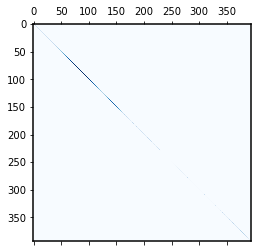

The first  230  states belong to band 1
energy of state  231 :  (2.2332881366051622-0.002896324800474913j)  eV
[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.0

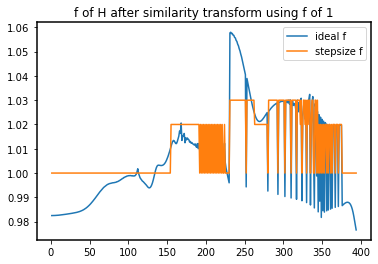

evaluate Green's function at frequecy: [-2.16880434e+01+1.64235812e-01j -2.16808686e+01+1.64554056e-01j
 -2.16689116e+01+1.65083181e-01j -2.16521745e+01+1.65821266e-01j
 -2.16306597e+01+1.66765629e-01j -2.16043706e+01+1.67912831e-01j
 -2.15733112e+01+1.69258682e-01j -2.15374864e+01+1.70798253e-01j
 -2.14969019e+01+1.72525884e-01j -2.14515640e+01+1.74435193e-01j
 -2.14014800e+01+1.76519094e-01j -2.13466580e+01+1.78769807e-01j
 -2.12871070e+01+1.81178874e-01j -2.12228368e+01+1.83737173e-01j
 -2.11538582e+01+1.86434936e-01j -2.10801830e+01+1.89261767e-01j
 -2.10018238e+01+1.92206658e-01j -2.09187945e+01+1.95258004e-01j
 -2.08311099e+01+1.98403627e-01j -2.07387859e+01+2.01630788e-01j
 -2.06418395e+01+2.04926211e-01j -2.05402891e+01+2.08276092e-01j
 -2.04341543e+01+2.11666122e-01j -2.03234558e+01+2.15081503e-01j
 -2.02082159e+01+2.18506958e-01j -2.00884582e+01+2.21926751e-01j
 -1.99642078e+01+2.25324696e-01j -1.98354913e+01+2.28684169e-01j
 -1.97023368e+01+2.31988120e-01j -1.95647744e+01+2.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


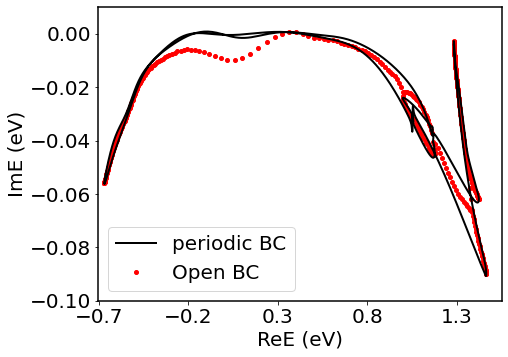

2002
(0.9511478858183302-0.00042813163746471036j)
bottom: (0.2822390300943378-0.05592121036521361j)


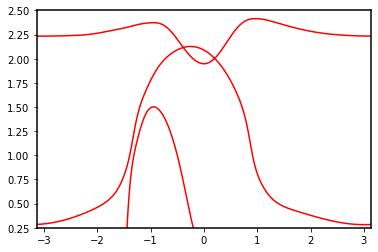

394 states in band


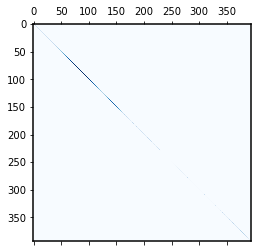

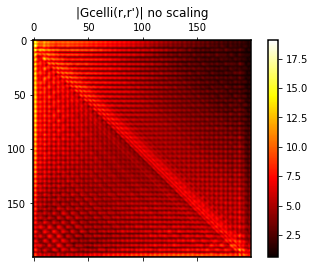

use f= 1.02 to similar transform H
matrix v's rank: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


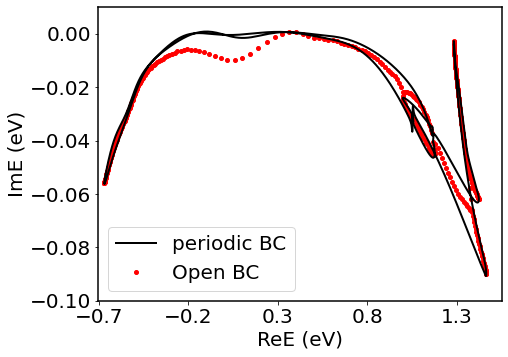

2002
(0.9511478858183302-0.00042813163746471036j)
bottom: (0.2822390300943378-0.05592121036521361j)


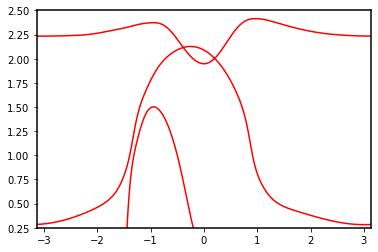

394 states in band


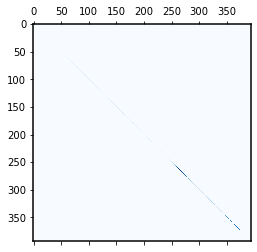

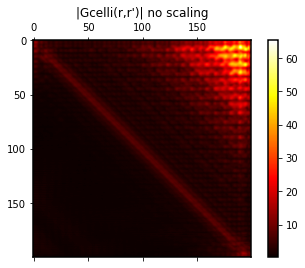

use f= 1.03 to similar transform H
matrix v's rank: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


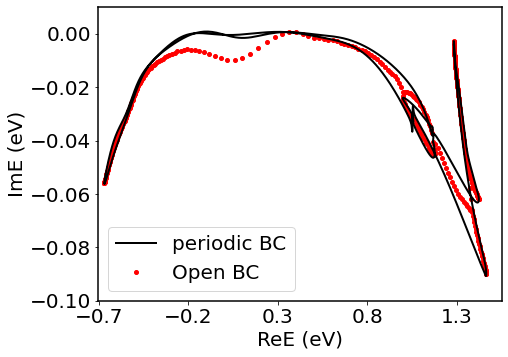

2002
(0.9511478858183302-0.00042813163746471036j)
bottom: (0.2822390300943378-0.05592121036521361j)


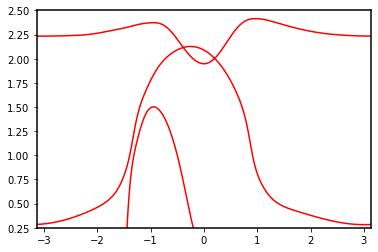

394 states in band


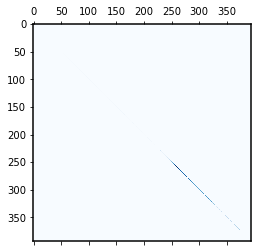

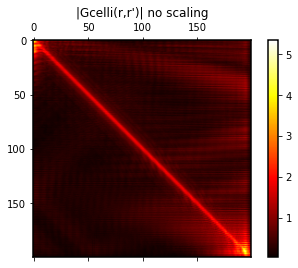

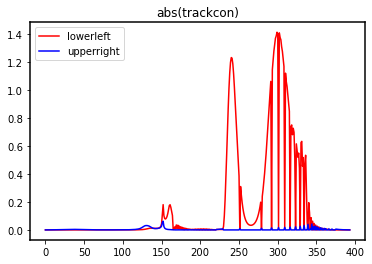

max density: 182.14692821323555


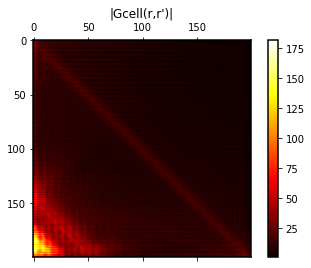

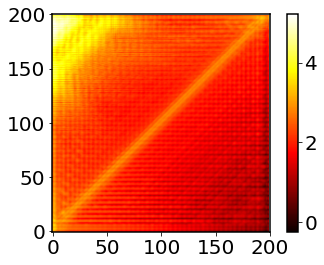

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

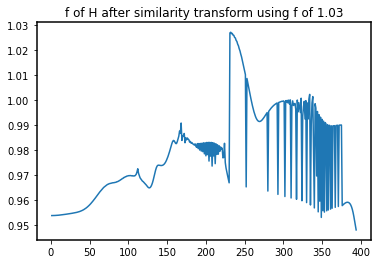

wtarg list:
[0.28232075-5.59330951e-02j 0.28240476-5.59109775e-02j
 0.28254474-5.58740929e-02j 0.28274065-5.58224101e-02j
 0.28299243-5.57558860e-02j 0.2833    -5.56744708e-02j
 0.28366326-5.55781049e-02j 0.28408211-5.54667298e-02j
 0.28455643-5.53402806e-02j 0.28508607-5.51987037e-02j
 0.28567088-5.50419427e-02j 0.28631072-5.48699648e-02j
 0.28700539-5.46827385e-02j 0.28775473-5.44802697e-02j
 0.28855855-5.42625685e-02j 0.28941663-5.40296979e-02j
 0.29032877-5.37817266e-02j 0.29129475-5.35187917e-02j
 0.29231435-5.32410362e-02j 0.29338731-5.29486859e-02j
 0.29451339-5.26419717e-02j 0.29569233-5.23212190e-02j
 0.29692385-5.19867564e-02j 0.29820766-5.16390148e-02j
 0.29954348-5.12784273e-02j 0.30093095-5.09055295e-02j
 0.30236978-5.05208621e-02j 0.30385958-5.01250571e-02j
 0.30540002-4.97187619e-02j 0.30699066-4.93026888e-02j
 0.30863116-4.88775872e-02j 0.31032102-4.84442252e-02j
 0.31205986-4.80034450e-02j 0.31384715-4.75560396e-02j
 0.31568247-4.71029277e-02j 0.31756525-4.66448935e-02

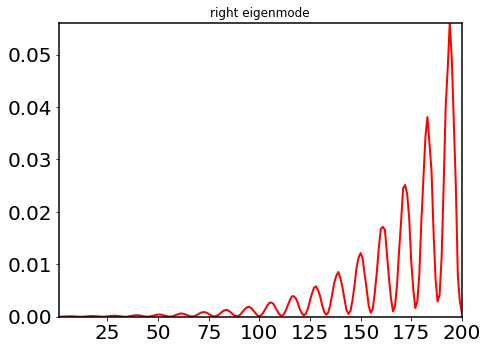

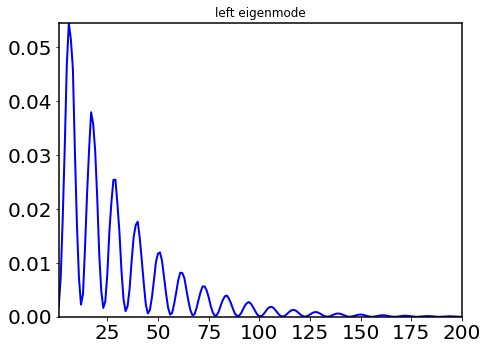

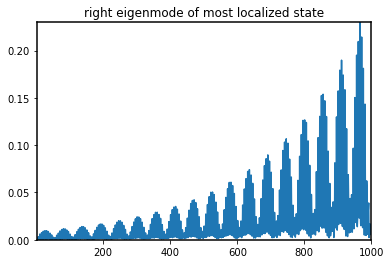

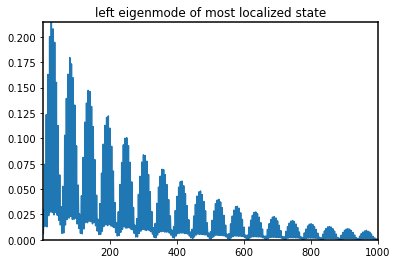

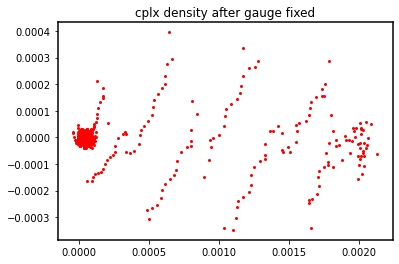

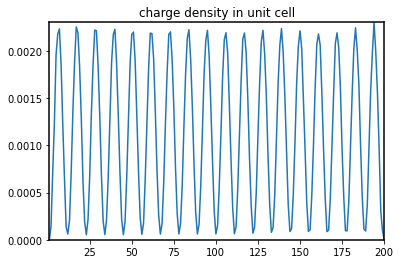

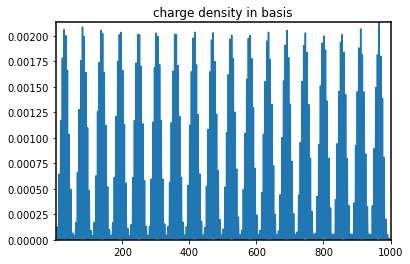

-0.18430821619315813


In [121]:
from scipy.sparse.linalg import eigs
from numpy import unravel_index
def consHfs(dimfit,ncell,wmatrixfinal,f):
    #first row and the last row
    Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
    Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[2,:,:]#+1j*1
    Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[3,:,:]*f
    Hfinite[0:dimfit,2*dimfit:3*dimfit]=wmatrixfinal[4,:,:]*f**2
    Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[1,:,:]/f
    Hfinite[-dimfit:,-3*dimfit:-2*dimfit]=wmatrixfinal[0,:,:]/f**2
    Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[2,:,:]#+1j
    #assign block matrix row by row
    for i in range(1,ncell-1):
        if (i-2)>=0:
             Hfinite[i*dimfit:(i+1)*dimfit,(i-2)*dimfit:(i-1)*dimfit]=wmatrixfinal[0,:,:]/f**2
        if (i+3)<=ncell:
             Hfinite[i*dimfit:(i+1)*dimfit,(i+2)*dimfit:(i+3)*dimfit]=wmatrixfinal[4,:,:]*f**2
        Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[1,:,:]/f
        Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[2,:,:]
        Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[3,:,:]*f
    return Hfinite

#wmatrixfinal=np.copy(wmatrix1)
####################parameter definition region#######################################################
#shift constant
shiftconst=np.mean(inteqpr[:,:])-0.89#np.mean(inteqpr[:,0])-0.89#-np.mean(np.abs(gweit0[:,0]))*1j
#shiftconst=0
#shiftconst=np.mean(inteqpr[:,1])
#omega at which Green's function is evaluated in (eV)
omega=0.83+0.9511478858183302
ncell=200
#define a decay factor used for similarity transformation
fs=[1,1.02,1.03]
#fs=[1]
#choose file here
wmatrixfinal=np.genfromtxt("wmatrixfile2bandssm",dtype=complex)
#wmatrixfinal=whmatrix
###################end parameter definition region#####################################################
wmatrixfinal=wmatrixfinal.flatten().reshape((5,dimfit,dimfit))
#don't forget to shift imaginary part back
#############################################################
#first construct Hfinite without similarity transformation###
#used to determine best f for each state#####################
#############################################################
Hfinite=consHfs(dimfit,ncell,wmatrixfinal,1)
w,v=np.linalg.eig(Hfinite)
w+=shiftconst
wl,vl=np.linalg.eig(Hfinite.conjugate().T)
wl+=shiftconst.conjugate()
#print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
wl=wl.conjugate()
#sort w,wl,v,vl
sortidx=np.argsort(w)
sortidxl=np.argsort(wl)
w=w[sortidx]
wl=wl[sortidxl]
v=v[:,sortidx]
vl=vl[:,sortidxl]
####################parameter defined here to manually delete some "outliners"###############################################
delidx=np.argwhere((w.real>1.76)&(w.real<2)&(w.imag>-0.06)&(w.imag<-0.05)|(w.real>2)&(w.real<2.2)&(w.imag>-0.01)&(w.imag<0))
#delidx=np.argwhere((w.real>2.27)&(w.real<2.3)&(w.imag<0)&(w.imag>-0.01))
#delidx=[]
#############################################################################################################################
print("delete some eigenenergies with index:",delidx)
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)


####################use mask to delete all points from irelevant bands######################################
#mask=(w.real>-1000) & (w.real<1000) & (w.imag<10000) & (w.imag>-10000)
#mask to further clean up contributions from other bands
mask=(w.real>0.25) & (w.real<2.5) & (w.imag>-0.1) & (w.imag<0.01)
############################################################################################################
print(np.sum(mask),"states in band")
vtarg=v[:,mask]
vtargl=vl[:,mask]
wtarg=w[mask]
wtargl=wl[mask]

#plot overlap matrix
overlap=np.matmul(vtargl.conjugate().T,vtarg)
fig, ax = plt.subplots()
ax.matshow(np.abs(overlap),cmap=plt.cm.Blues)
plt.show()

#now find best f in the list of f provided from input for each state and store in the index in flist#######
flist=np.zeros(np.sum(mask))
nob=True
for i in range(np.sum(mask)):
    fi=np.mean(np.abs(vtarg[-dimfit:,i]/vtarg[0:dimfit,i]),axis=0)**(1/(ncell-1))
    if fi>1.05 and nob:
        bdy=i
        nob=False
        print("The first ",bdy," states belong to band 1")
        print("energy of state ",bdy+1,": ",wtarg[i]," eV")
    flist[i]=fs[np.argmin(np.abs(fi-fs))]
print(flist)
#plot ideal f for each state
plt.title("f of H after similarity transform using f of 1")
plt.plot(np.linspace(1,np.sum(mask),np.sum(mask)),np.mean(np.abs(vtarg[-dimfit:,:]/vtarg[0:dimfit,:]),axis=0)**(1/(ncell-1)),label="ideal f")
plt.plot(np.linspace(1,np.sum(mask),np.sum(mask)),flist,label="stepsize f")
plt.legend()
plt.show()

###########################################################################################################

#start to calculate Green's function related quantities
# calculate Green's function
G=np.zeros((ncell*dimfit,ncell*dimfit),dtype=complex)
Gcell=np.zeros((ncell,ncell))
#track contributions from each state
trackconll=np.zeros(np.sum(mask))
trackconur=np.zeros(np.sum(mask))
print("evaluate Green's function at frequecy:",w," eV")
#######################################################################################
#construct Hfinite with similarity transformation
#######################################################################################
for f in fs:
    print("use f=",f,"to similar transform H")
    Hfinite=consHfs(dimfit,ncell,wmatrixfinal,f)
#fig, ax = plt.subplots()
#plt.title("|H(r,r')|^2")
#cax=ax.matshow(np.abs(Hfinite)**2,interpolation="gaussian",cmap="hot")
#fig.colorbar(cax)
#plt.show()
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
#w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM',tol=1e-24)
    w,v=np.linalg.eig(Hfinite)
    w+=shiftconst
    vrank=np.linalg.matrix_rank(v, tol=None, hermitian=False)
    print("matrix v's rank:",vrank)
    wl,vl=np.linalg.eig(Hfinite.conjugate().T)
    wl+=shiftconst.conjugate()
    #print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
    wl=wl.conjugate()
    #sort energies
    sortidx=np.argsort(w)
    sortidxl=np.argsort(wl)
    w=w[sortidx]
    wl=wl[sortidxl]
    v=v[:,sortidx]
    vl=vl[:,sortidxl]
##########################################################################
# now we delete several data points that do not belong to the target bands
##########################################################################
    w=np.delete(w,delidx)
    v=np.delete(v,delidx,axis=1)
    wl=np.delete(wl,delidx)
    vl=np.delete(vl,delidx,axis=1)
    
#plot the band energy in periodic system + that of finite system################
    kinter=np.linspace(-np.pi,np.pi,1001)
    ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
    ekfit+=shiftconst
    
    plt.figure(figsize=(8,6))
    plt.subplots_adjust(left=0.2,bottom=0.2)
    
    fin,=plt.plot(w.real-0.9511478858183302,w.imag,"ro",markersize=4,label="Open BC")
    for i in range(dimfit):
        per,=plt.plot(ekfit[i,:].real-0.9511478858183302,ekfit[i,:].imag,'k-',lw=2,label="periodic BC")
    plt.rc('axes',linewidth=1.5)
    plt.legend(handles=[per,fin],fontsize=20)
    plt.xlabel("ReE (eV)",fontsize=20)
    plt.ylabel("ImE (eV)",fontsize=20)
    plt.axis([0.25-0.9511478858183302,2.5-0.9511478858183302,-0.1,0.01])
    #plt.axis([1.8,2.2,-0.06,-0.02])
    plt.xticks(np.linspace(-0.7,1.3,5),fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("finitebands.eps")
    plt.show()
    flatekfit=ekfit.flatten()
    idxmask=(flatekfit.real>0.25) & (flatekfit.real<2.5) & (flatekfit.imag>-0.1) & (flatekfit.imag<0.01)
    ekfit2bnd=flatekfit[idxmask]
    ekfit2bnd=np.sort(ekfit2bnd)
    print(len(ekfit2bnd))
    print(ekfit2bnd[627])
    print("bottom:",ekfit2bnd[0])
    for i in range(dimfit):
        plt.plot(kinter,ekfit[i,:].real,'r',lw=1.5)
    plt.axis([np.min(kinter),np.max(kinter),0.25,2.5])
    plt.show()
#################################################################################

#use mask to delete energies from irrelevant bands
    print(np.sum(mask),"states in band")
    vtarg=v[:,mask]
    vtargl=vl[:,mask]
    wtarg=w[mask]
    wtargl=wl[mask]


#plot overlap matrix
    overlap=np.matmul(vtargl.conjugate().T,vtarg)
    fig, ax = plt.subplots()
    ax.matshow(np.abs(overlap),cmap=plt.cm.Blues)
    plt.show()

    Gi=np.zeros((ncell*dimfit,ncell*dimfit),dtype=complex)
    #track contributions from each state
    trackconill=np.zeros(np.sum(mask))
    trackconiur=np.zeros(np.sum(mask))
#############################################################
#choose either full contribution or just from the first band#
#############################################################
    for i in range(np.sum(mask)):
#    for i in range(bdy):
        if flist[i]==f:
            Gi+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])/overlap[i,i]
            #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
            trackconill[i]=np.mean(np.abs(np.outer(vtarg[-dimfit:,i],vtargl[0:dimfit,i].conjugate())/(omega-wtarg[i])/overlap[i,i]))*f**(ncell-1)
            trackconiur[i]=np.mean(np.abs(np.outer(vtarg[0:dimfit,i],vtargl[-dimfit:,i].conjugate())/(omega-wtarg[i])/overlap[i,i]))/f**(ncell-1)
#print("max G component:",np.max(np.abs(G))," at position ",unravel_index(G.argmax(), G.shape))
#fig, ax = plt.subplots()
#plt.title("|G(r,r')|^2")
#cax=ax.matshow(np.abs(G)**2,interpolation="gaussian",cmap="hot")
#fig.colorbar(cax)
#plt.show()
#imG=G.imag
#spec=np.abs(np.diag(imG))
#speccell=np.zeros(ncell)
#for i in range(ncell):
#    speccell[i]=np.sum(spec[i*dimfit:(i+1)*dimfit]**2)
#plt.title("spec")
#plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),spec)
#plt.axis([1,ncell*dimfit,0,np.max(spec)])
#plt.show()
##plt.title("speccell")
#plt.plot(np.linspace(1,ncell,ncell),speccell)
#plt.axis([1,ncell,0,np.max(speccell)])
#plt.show()
#for i in range(np.sum(mask)):
#only state higher than omega can conduct
#    if wtarg[i]-omega>0:
#        #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]/(omega-wtarg[i])
#        G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
    Gcelli=np.zeros((ncell,ncell))
    for i in range(ncell):
        for j in range(ncell):
            Gcelli[i,j]=np.sum(np.abs(Gi[i*dimfit:(i+1)*dimfit,j*dimfit:(j+1)*dimfit]))
    po=np.linspace(1,ncell,ncell)
    rowpo=np.outer(np.ones(ncell),po)
    colpo=np.outer(po,np.ones(ncell))
    scale=np.power(np.zeros((ncell,ncell))+f,colpo-rowpo)
    fig, ax = plt.subplots()
    plt.title("|Gcelli(r,r')| no scaling")
    cax=ax.matshow(Gcelli,interpolation="gaussian",cmap="hot")
    fig.colorbar(cax)
    plt.show()
    Gcelli*=scale
    Gcell+=Gcelli
    G+=Gi
    trackconll+=trackconill
    trackconur+=trackconiur
    
    
###################plot results#########################    
plt.title("abs(trackcon)")
plt.plot(trackconll,"r",label="lowerleft")
plt.plot(trackconur,"b",label="upperright")
plt.legend()
plt.show()
#plt.title("trackcon.real")
#plt.plot(trackcon[:,ncell*dimfit-2,2].real,"r",label="lowerleft")
#plt.plot(trackcon[:,2,2].real,"k",label="(2,2)")
#plt.plot(trackcon[:,2,ncell*dimfit-2].real,"b",label="upperright")
#plt.legend()
#plt.show()
#plt.title("trackcon.imag")
#plt.plot(trackcon[:,ncell*dimfit-2,2].imag,"r",label="lowerleft")
#plt.plot(trackcon[:,2,2].imag,"k",label="(2,2)")
#plt.plot(trackcon[:,2,ncell*dimfit-2].imag,"b",label="upperright")
#plt.legend()
#plt.show()
#print("summation at (2,2):",np.sum(trackcon[:,2,2]))
#print("summation at upperright:",np.sum(trackcon[:,2,ncell*dimfit-2]))
#print("summation at lowerleft:",np.sum(trackcon[:,ncell*dimfit-2,2]))

print("max density:",np.max(Gcell))
fig, ax = plt.subplots()
plt.title("|Gcell(r,r')|")
cax=ax.matshow(Gcell,interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.savefig("Gcell.eps")
plt.show()
#plot in log scale
fig, ax = plt.subplots()
#plt.title("log|Gcell(r,r')|")
cax=ax.matshow(np.log(Gcell),interpolation="gaussian",cmap="hot",origin="lower")
ax.xaxis.set_ticks_position('bottom')
plt.rc('axes',linewidth=1.5)
plt.xticks([0,50,100,150,200],fontsize=20)
plt.yticks([0,50,100,150,200],fontsize=20)
cbar=fig.colorbar(cax)
cbar.ax.tick_params(labelsize=20) 
plt.savefig("logGcell.eps")
plt.show()
#####################################################################


#get vtargcell's quantities (sum within unit cell) not trust worthy because this only uses the last Similarity transformed H
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
#force a particular maxj
#maxj=185
plt.title("f of H after similarity transform using f of "+str(f))
plt.plot(np.linspace(1,np.sum(mask),np.sum(mask)),np.mean(np.abs(vtarg[-dimfit:,:]/vtarg[0:dimfit,:]),axis=0)**(1/(ncell-1)))
plt.show()
print("wtarg list:")
print(wtarg)
print("maxj=",maxj)
print("suggest f should times extra factor of:",np.mean(np.abs(vtarg[-dimfit:,i]/vtarg[0:dimfit,i]))**(1/(ncell-1)))
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-(wtarg[maxj]-shiftconst)*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-(wtarg[maxj]-shiftconst).conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
errorspect=wtarg[maxj]-wtargl[maxj]
print("spectrum discrepancy of H and H.dagger:",errorspect)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
print("plot wfc at energy:",wtarg[maxj])
#plot out eigenwavfunction
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.title("right eigenmode")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]),lw=2,color="r")
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.rc('axes',linewidth=1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("rightmode.eps")
plt.show()
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.title("left eigenmode")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]),lw=2,color="b")
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.rc('axes',linewidth=1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("leftmode.eps")
plt.show()
plt.title("right eigenmode of most localized state")
plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtarg[:,maxj]))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtarg[:,maxj]))])
plt.show()
plt.title("left eigenmode of most localized state")
plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtargl[:,maxj]))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtargl[:,maxj]))])
plt.show()
for i in range(np.sum(mask)):
    if np.abs(omega-wtarg[i])<0.01:
        plt.title("right eigenmode states closed to omega")
        print(i,"th energy:",wtarg[i])
        print("suggest f should times extra factor of:",np.mean(np.abs(vtarg[-dimfit:,i]/vtarg[0:dimfit,i]))**(1/(ncell-1)))
        plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtarg[:,i]))
        plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtarg[:,i]))])
        plt.show()
        plt.title("left eigenmode states closed to omega")
        plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtargl[:,i]))
        plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtargl[:,i]))])
        plt.show()
#calculate charge density
targcd=np.zeros(ncell)
ov=np.sum(vtarg[:,maxj]*vtargl[:,maxj].conjugate())
gauge=ov/np.abs(ov)
overlapg=vtarg[:,maxj]*vtargl[:,maxj].conjugate()/gauge
plt.title("cplx density after gauge fixed")
plt.plot(overlapg.real,overlapg.imag,"ro",markersize=2)
plt.show()
#charge density by definition##
cdr=overlapg.real
cdr[cdr<0]=0
###############################
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cdr[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
#cd=cd/np.sqrt(np.sum(np.abs(cd)**2))
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),cdr)
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cdr))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
#store right mode to file
outfil=open("wfcr","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtarg[0+dimfit*i,maxj]/gauge,vtarg[1+dimfit*i,maxj]/gauge,vtarg[2+dimfit*i,maxj]/gauge,vtarg[3+dimfit*i,maxj]/gauge))
outfil.close()
#store left mode to file
outfil=open("wfcl","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtargl[0+dimfit*i,maxj],vtargl[1+dimfit*i,maxj],vtargl[2+dimfit*i,maxj],vtargl[3+dimfit*i,maxj]))
outfil.close()
#store charge density info to file
outfil=open("cd","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(cd[0+dimfit*i],cd[1+dimfit*i],cd[2+dimfit*i],cd[3+dimfit*i]))
outfil.close()
cd=[]
cdr=[]
trackconll=[]
trackconur=[]
trackconill=[]
trackconiur=[]
vtarg=[]
vtargl=[]
Gcell=[]
G=[]
Gi=[]
Gcell=[]
Gcelli=[]

## calculate right eigvec and inverse to get leftvec

we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]
R: [-1, 0, 1]
error of orthogonality: 1.5103486906452662e+19
delete some eigenenergies with index: [[846]]


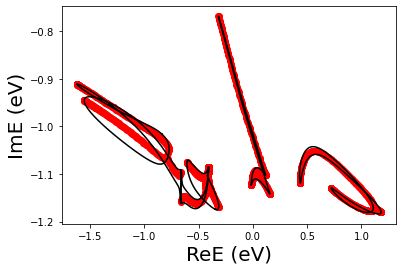

error of orthogonality: 157464941456462.53
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  

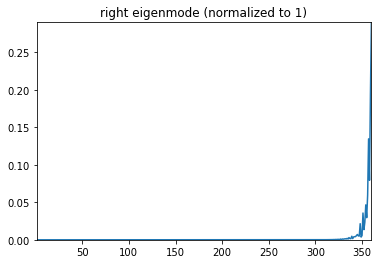

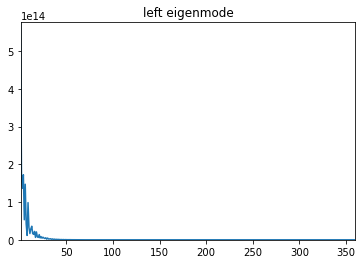

error of this right eigenmode: 1.4553042307522562e-28
error of this left eigenmode: 181546509.28753442


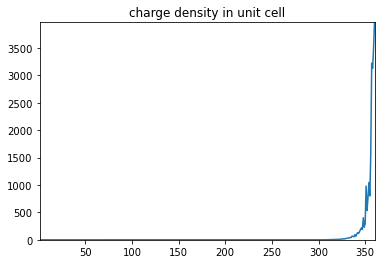

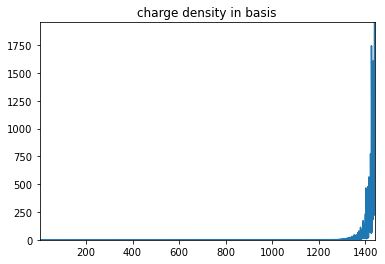

-24410.42520839894


In [93]:
from scipy.sparse.linalg import eigs
#wmatrixfinal=np.copy(wmatrix1)
wmatrixfinal=np.genfromtxt("wmatrixfilefermimorepar",dtype=complex)
wmatrixfinal=wmatrixfinal.flatten().reshape((5,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
print("R:",R)
ncell=360
Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]
Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[2,:,:]
Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]
Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]
#print(Hfinite)
for i in range(1,ncell-1):
    Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[2,:,:]
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
#w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM',tol=1e-24)
w,v=np.linalg.eig(Hfinite)
#wl,vl=eigs(Hfinite.conjugate().T,k=ncell*dimfit-2,which='SM',tol=1e-17)
vinv=np.linalg.inv(v)
vl=(np.linalg.inv(v)).conjugate().T
overlap=np.matmul(vl.conjugate().T,v)
print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
#wl=wl.conjugate()
sortidx=np.argsort(w)
#sortidxl=np.argsort(wl)
w=w[sortidx]
v=v[:,sortidx]
vl=vl[:,sortidx]
delidx=np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08))
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
#wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
plt.plot(w.real,w.imag,"ro")
for i in range(dimfit):
    plt.plot(ekfit[i,:].real,ekfit[i,:].imag,'k-',lw=1.5)
plt.xlabel("ReE (eV)",fontsize=20)
plt.ylabel("ImE (eV)",fontsize=20)
#plt.axis([-0.32,0.17,-1.16,-0.75])
plt.show()
#mask=(w.real>0) & (w.real<0.1) & (w.imag>-1.07) & (w.imag<-1.04)
mask=(w.real>-0.32) & (w.real<0.17) & (w.imag>-1.16) & (w.imag<-0.75)
vtarg=v[:,mask]
vtargl=vl[:,mask]
overlap=np.matmul(vtargl.conjugate().T,vtarg)
print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(np.sum(mask)))**2))
wtarg=w[mask]
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
print(vtargcell[:,maxj])
print("plot wfc at energy:",wtarg[maxj])
plt.title("right eigenmode (normalized to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.show()
plt.title("left eigenmode")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.show()
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-wtarg[maxj]*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-wtarg[maxj].conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
#calculate charge density
targcd=np.zeros(ncell)
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cd[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),np.abs(cd))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cd))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
#store matrix to file
outfil=open("wfcs","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtarg[0+dimfit*i,maxj],vtarg[1+dimfit*i,maxj],vtarg[2+dimfit*i,maxj],vtarg[3+dimfit*i,maxj]))
outfil.close()
vtarg1=vtarg[:,maxj]
vtargl1=vtargl[:,maxj]

## calculate left eigvec and inverse to get rightvec

we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]
R: [-1, 0, 1]
delete some eigenenergies with index: [[846]]


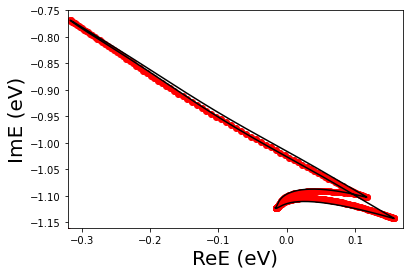

error of orthogonality: 8.896226206389841e-06
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

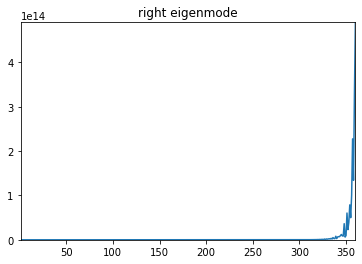

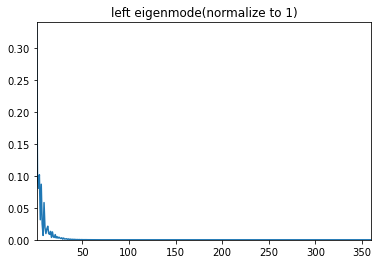

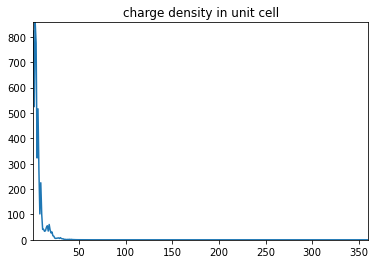

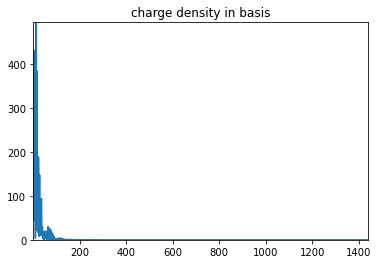

-0.6839759928936335


In [95]:
from scipy.sparse.linalg import eigs
#wmatrixfinal=np.copy(wmatrix1)
wmatrixfinal=np.genfromtxt("wmatrixfilefinal",dtype=complex)
wmatrixfinal=wmatrixfinal.flatten().reshape((3,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
#here we assume first nearest neighbor cell hopping
print("we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]")
print("R:",R)
ncell=360
Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]
Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[2,:,:]
Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]
Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]
#print(Hfinite)
for i in range(1,ncell-1):
    Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[2,:,:]
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
wl,vl=np.linalg.eig(Hfinite.conjugate().T)
vl=vl
#wl,vl=eigs(Hfinite.conjugate().T,k=ncell*dimfit-2,which='SM',tol=1e-17)
v=np.linalg.pinv(vl,rcond=1e-24).conjugate().T
#wl=wl.conjugate()
w=wl.conjugate()
sortidx=np.argsort(w)
#sortidxl=np.argsort(wl)
w=w[sortidx]
v=v[:,sortidx]
vl=vl[:,sortidx]
delidx=np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08))
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
#wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
plt.plot(w.real,w.imag,"ro")
plt.plot(ekfit[2,:].real,ekfit[2,:].imag,'k-',lw=1.5)
plt.xlabel("ReE (eV)",fontsize=20)
plt.ylabel("ImE (eV)",fontsize=20)
plt.axis([-0.32,0.17,-1.16,-0.75])
plt.show()
#mask=(w.real>0) & (w.real<0.1) & (w.imag>-1.07) & (w.imag<-1.04)
mask=(w.real>-0.32) & (w.real<0.17) & (w.imag>-1.16) & (w.imag<-0.75)
vtarg=v[:,mask]
vtargl=vl[:,mask]
overlap=np.matmul(vtargl.conjugate().T,vtarg)
print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(np.sum(mask)))**2))
wtarg=w[mask]
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5*np.sum(vtargcell[:,:],axis=0)
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])/np.sum(vtargcell[:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-wtarg[maxj]*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-wtarg[maxj].conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
print("plot wfc at energy:",wtarg[maxj])
plt.title("right eigenmode")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.show()
plt.title("left eigenmode(normalize to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.show()
#calculate charge density
targcd=np.zeros(ncell)
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cd[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),np.abs(cd))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cd))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
vtarg2=vtarg[:,maxj]
vtargl2=vtargl[:,maxj]

## calculate right eigvec and left eigvec

we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]
R: [-1, 0, 1]
matrix v's rank: 1434


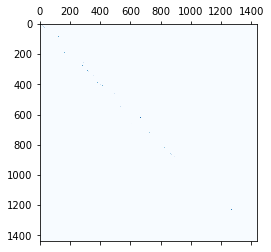

delete some eigenenergies with index: []


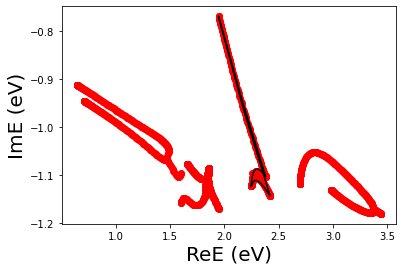

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

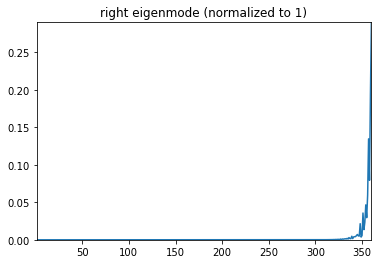

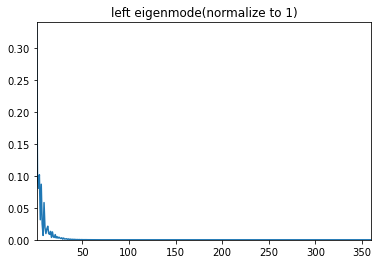

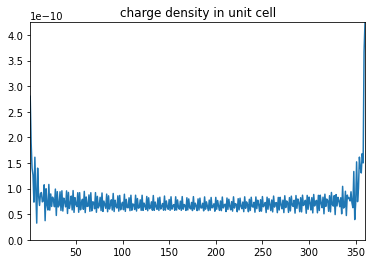

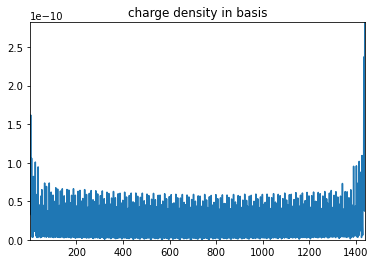

-1.6626180832026866e-08


In [100]:
from scipy.sparse.linalg import eigs
#wmatrixfinal=np.copy(wmatrix1)
wmatrixfinal=np.genfromtxt("wmatrixfilefinal",dtype=complex)
wmatrixfinal=wmatrixfinal.flatten().reshape((3,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
#here we assume first nearest neighbor cell hopping
print("we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]")
print("R:",R)
ncell=360
Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]
Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[2,:,:]
Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]
Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]
#print(Hfinite)
for i in range(1,ncell-1):
    Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[2,:,:]
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
#w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM',tol=1e-24)
w,v=np.linalg.eig(Hfinite)
vrank=np.linalg.matrix_rank(v, tol=None, hermitian=False)
print("matrix v's rank:",vrank)
wl,vl=np.linalg.eig(Hfinite.conjugate().T)
overlap=np.matmul(vl.conjugate().T,v)
fig, ax = plt.subplots()
ax.matshow(np.abs(overlap),cmap=plt.cm.Blues)
plt.show()
#print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
wl=wl.conjugate()
sortidx=np.argsort(w)
sortidxl=np.argsort(wl)
w=w[sortidx]
wl=wl[sortidxl]
v=v[:,sortidx]
vl=vl[:,sortidxl]
#delidx=np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08))
delidx=[]
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
plt.plot(w.real+3.154210171611672-0.89,w.imag,"ro")
plt.plot(ekfit[2,:].real+3.154210171611672-0.89,ekfit[2,:].imag,'k-',lw=1.5)
plt.xlabel("ReE (eV)",fontsize=20)
plt.ylabel("ImE (eV)",fontsize=20)
#plt.axis([-0.32+3.154210171611672-0.89,0.17+3.154210171611672-0.89,0.75,1.16])
plt.show()
#mask=(w.real>0) & (w.real<0.1) & (w.imag>-1.07) & (w.imag<-1.04)
mask=(w.real>-0.32) & (w.real<0.17) & (w.imag>-1.16) & (w.imag<-0.75)
vtarg=v[:,mask]
vtargl=vl[:,mask]
#overlap=np.matmul(vtargl.conjugate().T,vtarg)
#print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(np.sum(mask)))**2))
wtarg=w[mask]
wtargl=wl[mask]
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-wtarg[maxj]*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-wtarg[maxj].conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
errorspect=wtarg[maxj]-wtargl[maxj]
print("spectrum discrepancy of H and H.dagger:",errorspect)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
print("plot wfc at energy:",wtarg[maxj])
plt.title("right eigenmode (normalized to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.show()
plt.title("left eigenmode(normalize to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.show()
#calculate charge density
targcd=np.zeros(ncell)
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cd[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),np.abs(cd))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cd))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
#store matrix to file
outfil=open("wfcs","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtarg[0+dimfit*i,maxj],vtarg[1+dimfit*i,maxj],vtarg[2+dimfit*i,maxj],vtarg[3+dimfit*i,maxj]))
outfil.close()


## Hermitian Hamiltonian

we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]
R: [-1, 0, 1]
matrix v's rank: 761
delete some eigenenergies with index: []
2.2909101716116718


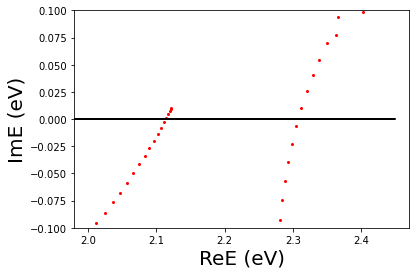

32 states in band


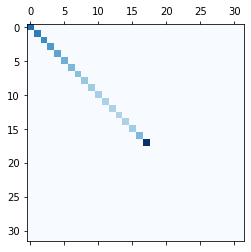

max density: 9.884810559132396e+29


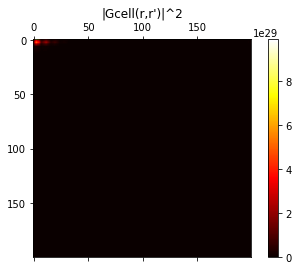

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
0 right eigenmode
32 left eigenmode
wtarg list:
[2.0122791 -0.095317j   2.02469656-0.08599244j 2.0363432 -0.07671388j
 2.04720999-0.0675691j  2.05729427-0.05864038j 2.06659905-0.05000461j
 2.07513204-0.04173317j 2.08290452-0.03389174j 2.08993032-0.02654015j
 2.09622476-0.01973232j 2.10180381-0.01351635j 2.10668332-0.00793468j
 2.11087836-0.00302422j 2.11440281+0.00118342j 2.1172689 +0.00466173j
 2.119487  +0.00738921j 2.12106534+0.00934924j 2.12200992+0.01052998j
 2.28122021-0.09278754j 2.28438065-0.07471661j 2.2883302 -0.05695722j
 2.2930835 -0.03954828j 2.2986531 -0.02253241j 2.30504607-0.00596083j
 2.31224586+0.01012639j 2.32031246+0.02573202j 2.32931096+0.0405036j
 2.33827652+0.05468082j 2.34912213+0.07014011j 2.36279391+0.07776497j
 2.36620368+0.09367243j 2.40321671+0.09861819j]
maxj= 0
s

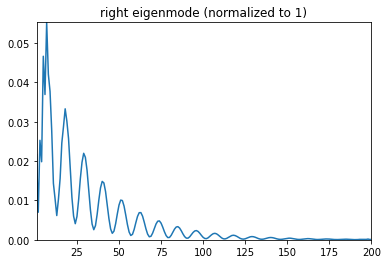

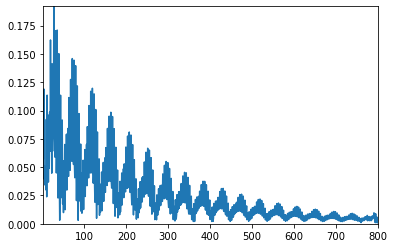

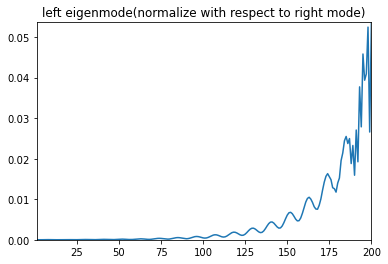

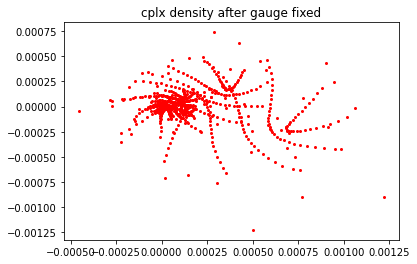

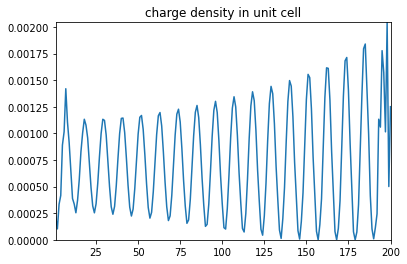

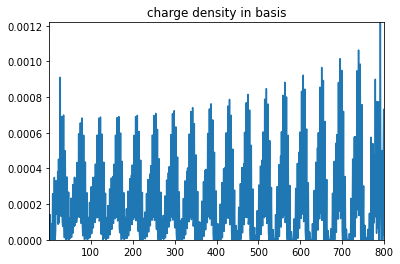

-0.19614634762286504


In [136]:
from scipy.sparse.linalg import eigs
def consHhermitfs(dimfit,ncell,wmatrixfinal,f):
    Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
    Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]#+1j*1
    Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[0,:,:].conjugate().T*f
    Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]/f
    Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]#+1j
    
    for i in range(1,ncell-1):
        Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]/f
        Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
        Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[0,:,:].conjugate().T*f
    return Hfinite

#wmatrixfinal=np.copy(wmatrix1)
#shift constant
#shiftconst=np.mean(inteqpr[:,1])-0.8633+np.mean(np.abs(gweit0[:,1]))*1j
shiftconst=np.mean(inteqpr[:,1])-0.8633
#omega at which Green's function is evaluated in (eV)
omega=2.08377
#choose file here
wmatrixfinal=np.genfromtxt("wmatrixfilefinali0",dtype=complex)
wmatrixfinal=wmatrixfinal.flatten().reshape((3,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
#here we assume first nearest neighbor cell hopping
print("we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]")
print("R:",R)
ncell=200
#define a decay factor used for similarity transformation
f=1#1.056125270353193
#construct Hfinite with similarity transformation
Hfinite=consHhermitfs(dimfit,ncell,wmatrixfinal,f)
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
#w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM',tol=1e-24)
w,v=np.linalg.eig(Hfinite)
w+=shiftconst
vrank=np.linalg.matrix_rank(v, tol=None, hermitian=False)
print("matrix v's rank:",vrank)
wl,vl=np.linalg.eig(Hfinite.conjugate().T)
wl+=shiftconst.conjugate()
#print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
wl=wl.conjugate()
sortidx=np.argsort(w)
sortidxl=np.argsort(wl)
w=w[sortidx]
wl=wl[sortidxl]
v=v[:,sortidx]
vl=vl[:,sortidxl]
#delidx=np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08))
#delidx=np.argwhere((w.real>2.3)&(w.real<2.35)&(w.imag<0)&(w.imag>-0.01))
delidx=[]
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
ekfit+=shiftconst
print(shiftconst)
plt.plot(w.real,w.imag,"ro",markersize=2)
plt.plot(ekfit[2,:].real,np.zeros(len(ekfit[2,:])),'k-',lw=1.5)
plt.xlabel("ReE (eV)",fontsize=20)
plt.ylabel("ImE (eV)",fontsize=20)
#plt.axis([-0.32,0.17,-1.16,-0.75])
plt.axis([1.98,2.47,-0.1,0.1])
#plt.axis([1,3,-0.3,0.2])
plt.show()
mask=(w.real>1.98) & (w.real<2.47) & (w.imag>-0.1) & (w.imag<0.1)
#mask=(w.real>1.97) & (w.real<2.5) & (w.imag<0.1) & (w.imag>-0.2)
print(np.sum(mask),"states in band")
#mask=(w.real>1.97) & (w.real<2.5) & (w.imag>-0.01) & (w.imag<0.1)
vtarg=v[:,mask]
vtargl=vl[:,mask]
#plot overlap matrix
overlap=np.matmul(vtargl.conjugate().T,vtarg)
fig, ax = plt.subplots()
ax.matshow(np.abs(overlap),cmap=plt.cm.Blues)
plt.show()
wtarg=w[mask]
wtargl=wl[mask]
# calculate Green's function
G=np.zeros((ncell*dimfit,ncell*dimfit),dtype=complex)
for i in range(np.sum(mask)):
    G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]/(omega-wtarg[i])
    #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
Gcell=np.zeros((ncell,ncell))
for i in range(ncell):
    for j in range(ncell):
        Gcell[i,j]=np.sum(np.abs(G[i*dimfit:(i+1)*dimfit,j*dimfit:(j+1)*dimfit])**2)
po=np.linspace(1,ncell,ncell)
rowpo=np.outer(np.ones(ncell),po)
colpo=np.outer(po,np.ones(ncell))
scale=np.power(np.zeros((ncell,ncell))+f,colpo-rowpo)
Gcell*=scale**2
print("max density:",np.max(Gcell))
fig, ax = plt.subplots()
plt.title("|Gcell(r,r')|^2")
cax=ax.matshow(np.abs(Gcell),interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
print("wtarg list:")
print(wtarg)
#force a particular maxj
#maxj=186
print("maxj=",maxj)
print("suggest f should times extra factor of:",np.abs(vtarg[-1,maxj]/vtarg[dimfit-1,maxj])**(1/(ncell-1)))
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-(wtarg[maxj]-shiftconst)*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-(wtarg[maxj]-shiftconst).conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
errorspect=wtarg[maxj]-wtargl[maxj]
print("spectrum discrepancy of H and H.dagger:",errorspect)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
print("plot wfc at energy:",wtarg[maxj])
plt.title("right eigenmode (normalized to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.show()
plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtarg[:,maxj]))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtarg[:,maxj]))])
plt.show()
plt.title("left eigenmode(normalize with respect to right mode)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.show()
#calculate charge density
targcd=np.zeros(ncell)
ov=np.sum(vtarg[:,maxj]*vtargl[:,maxj].conjugate())
gauge=ov/np.abs(ov)
overlapg=vtarg[:,maxj]*vtargl[:,maxj].conjugate()/gauge
plt.title("cplx density after gauge fixed")
plt.plot(overlapg.real,overlapg.imag,"ro",markersize=2)
plt.show()
#charge density by definition##
cdr=overlapg.real
cdr[cdr<0]=0
###############################
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cdr[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
#cd=cd/np.sqrt(np.sum(np.abs(cd)**2))
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),cdr)
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cdr))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
#store right mode to file
outfil=open("wfcr","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtarg[0+dimfit*i,maxj]/gauge,vtarg[1+dimfit*i,maxj]/gauge,vtarg[2+dimfit*i,maxj]/gauge,vtarg[3+dimfit*i,maxj]/gauge))
outfil.close()
#store left mode to file
outfil=open("wfcl","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtargl[0+dimfit*i,maxj],vtargl[1+dimfit*i,maxj],vtargl[2+dimfit*i,maxj],vtargl[3+dimfit*i,maxj]))
outfil.close()
#store charge density info to file
outfil=open("cd","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(cd[0+dimfit*i],cd[1+dimfit*i],cd[2+dimfit*i],cd[3+dimfit*i]))
outfil.close()

## Symmtric Hamiltonian

we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]
R: [-1, 0, 1]


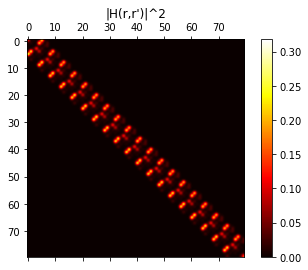

matrix v's rank: 80
delete some eigenenergies with index: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [21]
 [23]
 [25]
 [26]
 [27]
 [29]
 [31]
 [32]
 [34]
 [35]
 [36]
 [37]
 [41]]
20 states in band


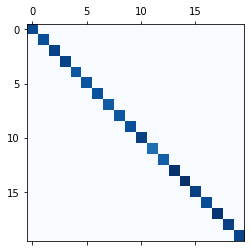

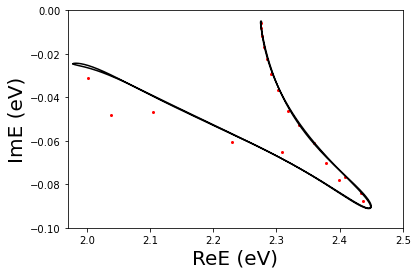

wtarg list: [2.00137073-0.03110075j 2.03828669-0.04795456j 2.10414714-0.04679244j
 2.23010834-0.0606159j  2.27582956-0.00802594j 2.27624403-0.00558357j
 2.27736049-0.01201303j 2.28013531-0.01680787j 2.28491588-0.0225939j
 2.29209186-0.02935176j 2.30321531-0.03670909j 2.30860123-0.06506205j
 2.31795607-0.0463396j  2.33582524-0.05282099j 2.35934458-0.0612137j
 2.37810254-0.07005992j 2.39880519-0.07809218j 2.40785905-0.07642966j
 2.43436212-0.08403728j 2.43779572-0.08778944j]


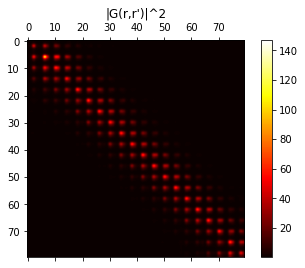

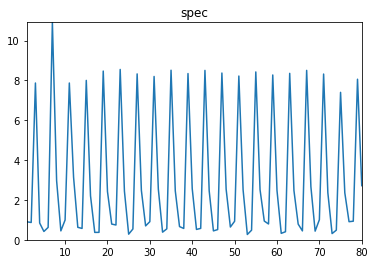

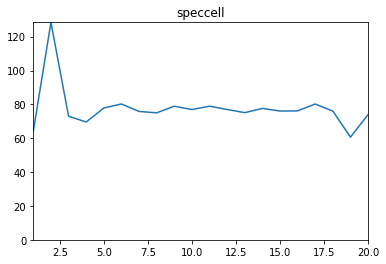

1.8500285604751414
max density: 253.09682565540342


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


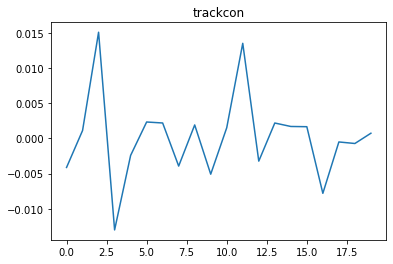

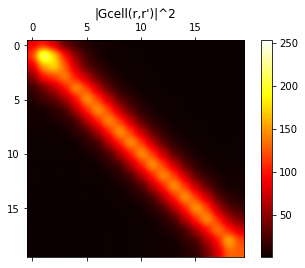

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True False  True False  True False False]
15 right eigenmode
5 left eigenmode
maxj= 4
suggest f should times extra factor of: 1.062330918024525
spectrum discrepancy of H and H.dagger: -7.632783294297951e-17j
error of this right eigenmode: 9.473770515062454e-31
error of this left eigenmode: 8.127923245116624e-31
plot wfc at energy: (2.2758295554541492-0.008025939544693661j)


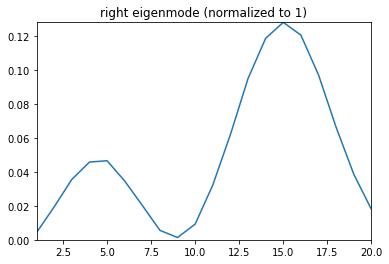

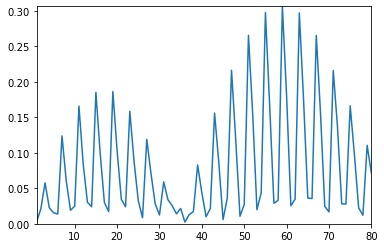

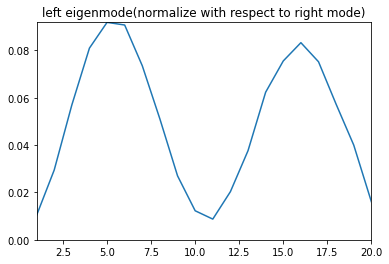

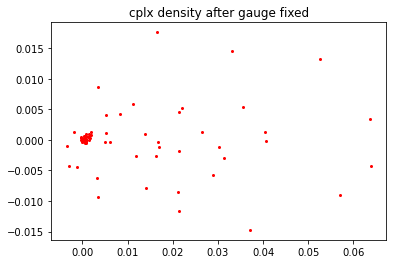

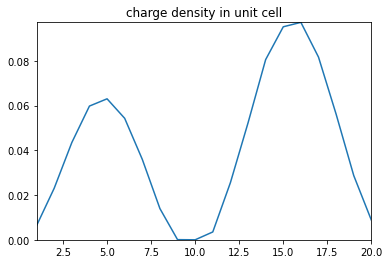

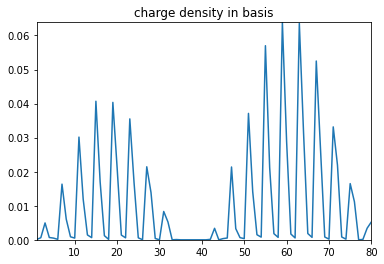

-0.8968927958172668


In [59]:
from scipy.sparse.linalg import eigs
def consHfs(dimfit,ncell,wmatrixfinal,f):
    Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
    Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]#+1j*1
    Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[2,:,:]*f
    Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]/f
    Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]#+1j
    
    for i in range(1,ncell-1):
        Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]/f
        Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
        Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[2,:,:]*f
    return Hfinite

#wmatrixfinal=np.copy(wmatrix1)
#shift constant
shiftconst=np.mean(inteqpr[:,1])-0.8633-np.mean(np.abs(gweit0[:,1]))*1j
#shiftconst=np.mean(inteqpr[:,1])
#omega at which Green's function is evaluated in (eV)
omega=2.3
#choose file here
wmatrixfinal=np.genfromtxt("wmatrixfilefinalsym",dtype=complex)
#wmatrixfinal=whmatrix
wmatrixfinal=wmatrixfinal.flatten().reshape((3,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
#here we assume first nearest neighbor cell hopping
print("we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]")
print("R:",R)
ncell=20
#define a decay factor used for similarity transformation
f=1#1.056125270353193
#construct Hfinite with similarity transformation
Hfinite=consHfs(dimfit,ncell,wmatrixfinal,f)
Hfinite=Hfinite.conjugate().T
fig, ax = plt.subplots()
plt.title("|H(r,r')|^2")
cax=ax.matshow(np.abs(Hfinite)**2,interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
#w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM',tol=1e-24)
w,v=np.linalg.eig(Hfinite)
w+=shiftconst
vrank=np.linalg.matrix_rank(v, tol=None, hermitian=False)
print("matrix v's rank:",vrank)
wl,vl=np.linalg.eig(Hfinite.conjugate().T)
wl+=shiftconst.conjugate()
#print("error of orthogonality:",np.sum(np.abs(overlap-np.eye(ncell*dimfit))**2))
wl=wl.conjugate()
sortidx=np.argsort(w)
sortidxl=np.argsort(wl)
w=w[sortidx]
wl=wl[sortidxl]
v=v[:,sortidx]
vl=vl[:,sortidxl]
#delidx=np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08))
delidx=np.argwhere((3/56*w.real+w.imag<2/35)&(w.real<2.28))
#delidx.append((w.))             
#delidx=[]
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
wl=np.delete(wl,delidx)
vl=np.delete(vl,delidx,axis=1)
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
ekfit=ekfit.conjugate()
ekfit+=shiftconst
#mask=(w.real>1.75) & (w.real<2.5) & (w.imag>-1.07) & (w.imag<1.04)
mask=(w.real>1.97) & (w.real<2.47) & (w.imag<0.1) & (w.imag>-0.2)
#mask=(w.real>-1000) & (w.real<1000) & (w.imag<10000) & (w.imag>-10000)
print(np.sum(mask),"states in band")
vtarg=v[:,mask]
vtargl=vl[:,mask]
#plot overlap matrix
overlap=np.matmul(vtargl.conjugate().T,vtarg)
fig, ax = plt.subplots()
ax.matshow(np.abs(overlap),cmap=plt.cm.Blues)
plt.show()
wtarg=w[mask]
wtargl=wl[mask]
plt.plot(wtarg.real,wtarg.imag,"ro",markersize=2)
plt.plot(ekfit[2,:].real,ekfit[2,:].imag,'k-',lw=1.5)
plt.xlabel("ReE (eV)",fontsize=20)
plt.ylabel("ImE (eV)",fontsize=20)
#plt.axis([-0.32,0.17,-1.16,-0.75])
plt.axis([1.97,2.5,-0.1,0])
#plt.axis([1,3,-0.3,0.2])
plt.show()
print("wtarg list:",wtarg)
# calculate Green's function
G=np.zeros((ncell*dimfit,ncell*dimfit),dtype=complex)
#if both electron and hole contribute to current
trackcon=np.zeros((np.sum(mask),ncell*dimfit,ncell*dimfit),dtype=complex)
for i in range(np.sum(mask)):
    G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]/(omega-wtarg[i])
    #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
    trackcon[i]=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]#/(omega-wtarg[i])
fig, ax = plt.subplots()
plt.title("|G(r,r')|^2")
cax=ax.matshow(np.abs(G)**2,interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
imG=G.imag
spec=np.abs(np.diag(imG))
speccell=np.zeros(ncell)
for i in range(ncell):
    speccell[i]=np.sum(spec[i*dimfit:(i+1)*dimfit]**2)
plt.title("spec")
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),spec)
plt.axis([1,ncell*dimfit,0,np.max(spec)])
plt.show()
plt.title("speccell")
plt.plot(np.linspace(1,ncell,ncell),speccell)
plt.axis([1,ncell,0,np.max(speccell)])
plt.show()
#for i in range(np.sum(mask)):
#only state higher than omega can conduct
#    if wtarg[i]-omega>0:
#        #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]/(omega-wtarg[i])
#        G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
Gcell=np.zeros((ncell,ncell))
for i in range(ncell):
    for j in range(ncell):
        Gcell[i,j]=np.sum(np.abs(G[i*dimfit:(i+1)*dimfit,j*dimfit:(j+1)*dimfit])**2)
plt.title("trackcon")
plt.plot(trackcon[:,ncell*dimfit-1,0])
plt.plot()
po=np.linspace(1,ncell,ncell)
rowpo=np.outer(np.ones(ncell),po)
colpo=np.outer(po,np.ones(ncell))
scale=np.power(np.zeros((ncell,ncell))+f,colpo-rowpo)
Gcell*=scale**2
print(Gcell[ncell-1,0])
print("max density:",np.max(Gcell))
fig, ax = plt.subplots()
plt.title("|Gcell(r,r')|^2")
cax=ax.matshow(Gcell,interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
vtargcell=np.zeros((ncell,np.sum(mask)))
vtargcelll=np.zeros((ncell,np.sum(mask)))
rightcharge=np.zeros(np.sum(mask))
maxj=0
hrightcharge=0
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
    vtargcelll[i]=np.sum(np.abs(vtargl[i*dimfit:(i+1)*dimfit])**2,axis=0)
maskrightmode=np.sum(vtargcell[int(ncell/2):,:],axis=0)>0.5
#print(np.sum(vtargcell[:,3],axis=0))
print(maskrightmode)
print(np.sum(maskrightmode),"right eigenmode")
print(np.sum(mask)-np.sum(maskrightmode),"left eigenmode")
for i in range(np.sum(mask)):
    rightcharge[i]=np.sum(vtargcell[ncell-5:,i])
    if rightcharge[i]>hrightcharge and wtarg[i].real>0.005:
        hrightcharge=rightcharge[i]
        maxj=i
#force a particular maxj
#maxj=186
print("maxj=",maxj)
print("suggest f should times extra factor of:",np.abs(vtarg[-1,maxj]/vtarg[dimfit-1,maxj])**(1/(ncell-1)))
errorright=np.sum(np.abs(np.dot(Hfinite,vtarg[:,maxj])-(wtarg[maxj]-shiftconst)*vtarg[:,maxj])**2)#/np.sum(np.abs(vtarg[:,maxj])**2)
errorleft=np.sum(np.abs(np.dot(Hfinite.conjugate().T,vtargl[:,maxj])-(wtarg[maxj]-shiftconst).conjugate()*vtargl[:,maxj])**2)#/np.sum(np.abs(vtargl[:,maxj])**2)
errorspect=wtarg[maxj]-wtargl[maxj]
print("spectrum discrepancy of H and H.dagger:",errorspect)
print("error of this right eigenmode:",errorright)
print("error of this left eigenmode:",errorleft)
print("plot wfc at energy:",wtarg[maxj])
plt.title("right eigenmode (normalized to 1)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcell[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcell[:,maxj]))])
plt.show()
plt.plot(np.linspace(1,ncell*dimfit,dimfit*ncell),np.abs(vtarg[:,maxj]))
plt.axis([1,ncell*dimfit,0,np.max(np.abs(vtarg[:,maxj]))])
plt.show()
plt.title("left eigenmode(normalize with respect to right mode)")
plt.plot(np.linspace(1,ncell,ncell),np.abs(vtargcelll[:,maxj]))
plt.axis([1,ncell,0,np.max(np.abs(vtargcelll[:,maxj]))])
plt.show()
#calculate charge density
targcd=np.zeros(ncell)
ov=np.sum(vtarg[:,maxj]*vtargl[:,maxj].conjugate())
gauge=ov/np.abs(ov)
overlapg=vtarg[:,maxj]*vtargl[:,maxj].conjugate()/gauge
plt.title("cplx density after gauge fixed")
plt.plot(overlapg.real,overlapg.imag,"ro",markersize=2)
plt.show()
#charge density by definition##
cdr=overlapg.real
cdr[cdr<0]=0
###############################
cd=np.abs(vtarg[:,maxj]*vtargl[:,maxj].conjugate())/wtarg[maxj].imag
for i in range(ncell):
    targcd[i]=np.abs(np.sum(cdr[i*dimfit:(i+1)*dimfit]))
plt.title("charge density in unit cell")
plt.plot(np.linspace(1,ncell,ncell),targcd)
plt.axis([1,ncell,0,np.max(targcd)])
plt.show()
plt.title("charge density in basis")
#cd=cd/np.sqrt(np.sum(np.abs(cd)**2))
plt.plot(np.linspace(1,ncell*dimfit,ncell*dimfit),cdr)
plt.axis([1,ncell*dimfit,0,np.max(np.abs(cdr))])
plt.show()
print(np.sum(np.abs(cd[-800:])*wtarg[maxj].imag))
#store right mode to file
outfil=open("wfcr","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtarg[0+dimfit*i,maxj]/gauge,vtarg[1+dimfit*i,maxj]/gauge,vtarg[2+dimfit*i,maxj]/gauge,vtarg[3+dimfit*i,maxj]/gauge))
outfil.close()
#store left mode to file
outfil=open("wfcl","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(vtargl[0+dimfit*i,maxj],vtargl[1+dimfit*i,maxj],vtargl[2+dimfit*i,maxj],vtargl[3+dimfit*i,maxj]))
outfil.close()
#store charge density info to file
outfil=open("cd","w")
for i in range(ncell):
    outfil.write("{:>32.9f}{:>32.9f}{:>32.9f}{:>32.9f}\n".format(cd[0+dimfit*i],cd[1+dimfit*i],cd[2+dimfit*i],cd[3+dimfit*i]))
outfil.close()

In [ ]:
#charge effect?
from scipy.sparse.linalg import eigs
#wmatrixfinal=np.copy(wmatrix1)
wmatrixfinal=np.genfromtxt("wmatrixfilefinal",dtype=complex)
wmatrixfinal=wmatrixfinal.flatten().reshape((3,dimfit,dimfit))
#don't forget to shift imaginary part back
#wmatrixfinal[1]=np.copy(wmatrixfinal)[1]+1j*np.eye(dimfit)*np.mean(inteqpi[:,1])
#here we assume first nearest neighbor cell hopping
print("we are assuming 1st nearest neighbor cell only!!!! check this for R=[-1,0,1]")
print("R:",R)
ncell=200
Hfinite=np.zeros((dimfit*ncell,dimfit*ncell),dtype=complex)
Hfinite[0:dimfit,0:dimfit]=wmatrixfinal[1,:,:]
Hfinite[0:dimfit,dimfit:2*dimfit]=wmatrixfinal[2,:,:]
Hfinite[-dimfit:,-2*dimfit:-dimfit]=wmatrixfinal[0,:,:]
Hfinite[-dimfit:,-dimfit:]=wmatrixfinal[1,:,:]
#print(Hfinite)
for i in range(1,ncell-1):
    Hfinite[i*dimfit:(i+1)*dimfit,(i-1)*dimfit:(i)*dimfit]=wmatrixfinal[0,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i)*dimfit:(i+1)*dimfit]=wmatrixfinal[1,:,:]
    Hfinite[i*dimfit:(i+1)*dimfit,(i+1)*dimfit:(i+2)*dimfit]=wmatrixfinal[2,:,:]
#Hfinite=Hfinite-np.eye(len(Hfinite))*(0.05-1.1j)
#print(np.diag(Hfinite))
w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM')
sortidx=np.argsort(w)
w=w[sortidx]
v=v[:,sortidx]
delidx=np.argwhere((w.real>0.16)|(w.real<-0.33)|(w.imag>-0.75)|(w.imag<-1.15))
delidx=np.append(delidx,np.argwhere((w.real>-0.02)&(w.real<0)&(w.imag>-1.1)&(w.imag<-1.08)))
print("delete some eigenenergies with index:",delidx)
###################################################################
# now we delete one data point that does not belong to this band
###################################################################
w=np.delete(w,delidx)
v=np.delete(v,delidx,axis=1)
print(len(w))
print("fermi energy:",w[int(ncell/2)])
kinter=np.linspace(-np.pi,np.pi,1001)
ekfit,wfccomfit=R2kHcplx(wmatrixfinal,1001,kinter,R)
plt.plot(w.real,w.imag,"ro")
plt.axvline(w[int(ncell/2)].real)
plt.plot(ekfit[2,:].real,ekfit[2,:].imag,'k-',lw=1.5)
#plt.axis([-0.33,0.16,-1.15,-0.75])
plt.show()
#mask=(w.real>0) & (w.real<0.1) & (w.imag>-1.07) & (w.imag<-1.04)
mask=(w.real<w[int(ncell/2)])
vtarg=v[:,mask]
wtarg=w[mask]
vtargcell=np.zeros((ncell,np.sum(mask)))
halfdecay=np.zeros(np.sum(mask))
maxj=0
#average within unit cell
for i in range(ncell):
    vtargcell[i]=np.sum(np.abs(vtarg[i*dimfit:(i+1)*dimfit])**2,axis=0)
#now calculate potential for each cell
U=np.sum(vtargcell,axis=1)
#U*np.linspace(1,ncell,ncell)/ncell
U=U-np.mean(U)
print(U)
U=np.outer(U,np.ones(dimfit)).flatten()
for j in range(10):
    Hfinite=Hfinite+np.diag(U)/100
    w,v=eigs(Hfinite,k=ncell*dimfit-2,which='SM')
    sortidx=np.argsort(w)
    w=w[sortidx]
    v=v[:,sortidx]
    plt.plot(w.real,w.imag,"ro",markersize=0.5)
    plt.axis([-0.5,0.2,-1.15,-1.05])
    plt.show()
for i in range(np.sum(mask)):
    for j in range(len(vtargcell[:,i])-1):
        if vtargcell[j,i]<np.max(vtargcell[:,i])/2 and vtargcell[j+1,i]>np.max(vtargcell[:,i])/2:
            #print("jth unit cell is the half decay length:",j+1)
            halfdecay[i]=j+1
            currentj=j+1
            if currentj>maxj:
                maxj=currentj
                maxi=i
print("plot wfc at energy:",wtarg[maxi])
plt.plot(np.abs(vtargcell[:,maxi]))

In [ ]:
phi0=np.zeros(ncell*dimfit,dtype=complex)
phi0[79]=1
ntime=60
dt=0.01
print(wtarg[0])
propH=np.zeros_like(Hfinite)
for i in range(np.sum(mask)):
    propH+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/overlap[i,i]*wtarg[i]
for i in range(ntime):
    phi0+=-1j*np.dot(propH,phi0)*dt
    plt.plot(np.abs(phi0))
    plt.show()

[-1.72696863 -1.71175191 -1.68648995 -1.65133099 -1.60648137 -1.55220428
 -1.48881823 -1.41669521 -1.33625846 -1.24798001 -1.15237792 -1.05001321
 -0.94148661 -0.827435   -0.70852766 -0.58546241 -0.45896142 -0.32976707
 -0.19863752 -0.06634228  0.06634228  0.19863752  0.32976707  0.45896142
  0.58546241  0.70852766  0.827435    0.94148661  1.05001321  1.15237792
  1.24798001  1.33625846  1.41669521  1.48881823  1.55220428  1.60648137
  1.65133099  1.68648995  1.71175191  1.72696863]
[-1.72696863 -1.71175191 -1.68648994 -1.65133099 -1.60648136 -1.55220429
 -1.48881822 -1.41669523 -1.33625844 -1.24798003 -1.1523779  -1.05001323
 -0.9414866  -0.827435   -0.70852766 -0.5854624  -0.45896143 -0.32976707
 -0.19863752 -0.06634228  0.06634228  0.19863752  0.32976707  0.45896143
  0.58546241  0.70852766  0.827435    0.94148661  1.05001322  1.15237791
  1.24798002  1.33625845  1.41669521  1.48881823  1.55220428  1.60648137
  1.65133099  1.68648994  1.71175191  1.72696863]
-0.06634228081992084
-0.

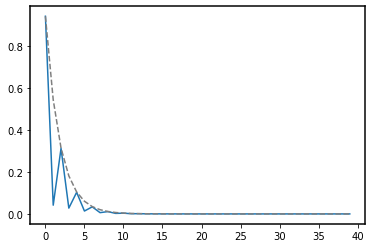

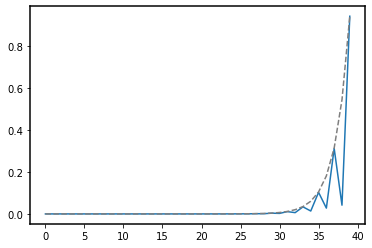

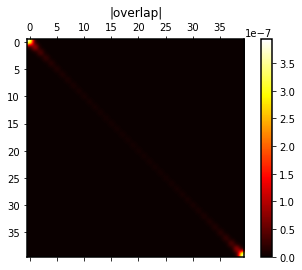

max density: (281.16060384581215+0j)


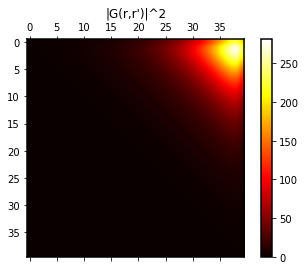

<ipython-input-58-70982579412d>:75: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.axis([1,ncell,0,np.max(spec)])


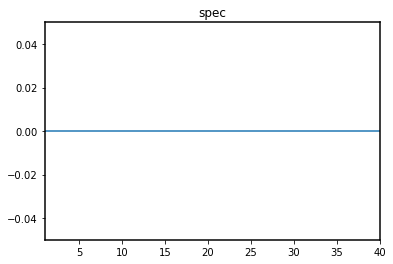

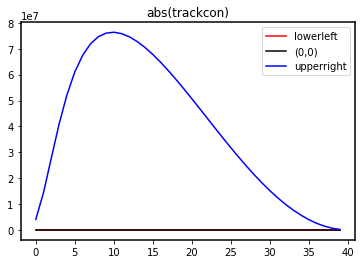

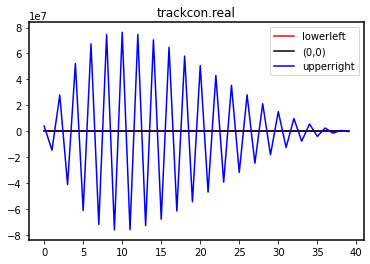

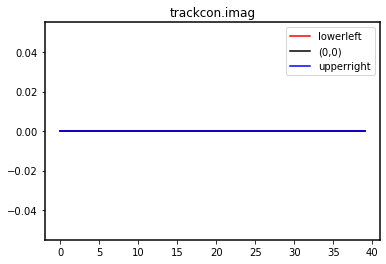

summation at (0,0): (-0.7778305153768799+0j)
summation at upperright: (190.53189688920975+0j)
summation at lowerleft: (-8.157738616992856e-18+0j)


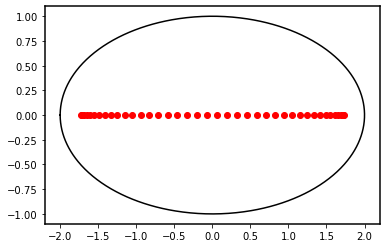

In [58]:
t=1
g=0.5
onsite=0
omega=-1.8690
ncell=40
whn=np.zeros((3,1,1),dtype=complex)
whn[0]=t-g
whn[2]=t+g
whn[1]=onsite
ekhn,wfchn=R2kHcplx(whn,1001,kinter,[-1,0,1])
#print(ekhn)
#metalH=np.zeros((ncell,ncell),dtype=complex)
metalH=np.zeros((ncell,ncell))
metalH[-1,-1]=onsite
for i in range(ncell-1):
    metalH[i,i+1]=t+g
    metalH[i,i]=onsite
    metalH[i+1,i]=t-g
    #metalH[i,i]=t
ww,vv=np.linalg.eig(metalH)
wwl,vvl=np.linalg.eig(metalH.T.conjugate())
#wwl,vvl=np.linalg.eig(metalH.T)
sortidx=np.argsort(ww)
sortidxl=np.argsort(wwl)
ww=ww[sortidx]
wwl=wwl[sortidxl]
print(ww)
print(wwl)
vv=vv[:,sortidx]
vvl=vvl[:,sortidxl]
print(ww[len(vv)//2-1])
print(wwl[len(vvl)//2-1])
print("ww list:",ww)
print(vv[0,len(vv)//2-1])
plt.plot(np.abs(vv[:,len(vv)//2-1]),lw=1.5)
func=np.power([np.sqrt(1/3)]*40,np.linspace(0,39,40))
plt.plot(func*0.9419016208462831,'--',color="tab:grey",lw=1.5)
plt.savefig("vv.eps")
plt.show()
plt.plot(np.abs(vvl[:,len(vv)//2-1]),lw=1.5)
plt.plot(func[::-1]*0.9419016208462831,'--',color="tab:grey",lw=1.5)
plt.savefig("vvl.eps")
plt.show()
overlap=np.matmul(vvl.conjugate().T,vv)
vvscale=np.copy(vv)
for i in range(ncell):
    vvscale[:,i]=vv[:,i]/overlap[i,i]
#print("should be identity:",np.matmul(vvl.conjugate().T,vvscale))
#print("should also be identity:",np.matmul(vvscale,vvl.conjugate().T))
fig, ax = plt.subplots()
plt.title("|overlap|")
cax=ax.matshow(np.abs(overlap),interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
trackcon=np.zeros((ncell,ncell,ncell),dtype=complex)
G=np.zeros((ncell,ncell),dtype=complex)
checkcomplete=np.zeros((ncell,ncell),dtype=complex)
recoverH=np.zeros((ncell,ncell),dtype=complex)
for i in range(ncell):
    G+=np.outer(vv[:,i],vvl[:,i].conjugate())/(omega-ww[i])/overlap[i,i]
    #G+=np.outer(vtarg[:,i],vtargl[:,i].conjugate())/(omega-wtarg[i])
    recoverH+=np.outer(vv[:,i],vvl[:,i].conjugate())*ww[i]/overlap[i,i]
    checkcomplete+=np.outer(vvscale[:,i],vvl[:,i].conjugate())
    trackcon[i]=np.outer(vv[:,i],vvl[:,i].conjugate())/overlap[i,i]/(omega-ww[i])
print("max density:",np.max(G))
fig, ax = plt.subplots()
plt.title("|G(r,r')|^2")
cax=ax.matshow(np.abs(G),interpolation="gaussian",cmap="hot")
fig.colorbar(cax)
plt.show()
imG=G.imag
spec=np.abs(np.diag(imG))
plt.title("spec")
plt.plot(np.linspace(1,ncell,ncell),spec)
plt.axis([1,ncell,0,np.max(spec)])
plt.show()
plt.title("abs(trackcon)")
plt.plot(np.abs(trackcon[:,ncell-1,0]),"r",label="lowerleft")
plt.plot(np.abs(trackcon[:,0,0]),"k",label="(0,0)")
plt.plot(np.abs(trackcon[:,0,ncell-1]),"b",label="upperright")
plt.legend()
plt.show()
plt.title("trackcon.real")
plt.plot(trackcon[:,ncell-1,0].real,"r",label="lowerleft")
plt.plot(trackcon[:,0,0].real,"k",label="(0,0)")
plt.plot(trackcon[:,0,ncell-1].real,"b",label="upperright")
plt.legend()
plt.show()
plt.title("trackcon.imag")
plt.plot(trackcon[:,ncell-1,0].imag,"r",label="lowerleft")
plt.plot(trackcon[:,0,0].imag,"k",label="(0,0)")
plt.plot(trackcon[:,0,ncell-1].imag,"b",label="upperright")
plt.legend()
plt.show()
print("summation at (0,0):",np.sum(trackcon[:,0,0]))
print("summation at upperright:",np.sum(trackcon[:,0,ncell-1]))
print("summation at lowerleft:",np.sum(trackcon[:,ncell-1,0]))
plt.plot(ww.real,[0]*len(ww),"ro")
plt.plot(ekhn[0].real,ekhn[0].imag,"k-")
plt.savefig("ww.eps")
plt.show()